#**Project MedQuAD-Chatbot Data analytics**

By/

 **1-Mahmoud Khorshed**     mahmoud.khorshed@queensu.ca
 
**2-Ahmed Salama**        21aes20@queensu.ca

**3-Esraa Saied**       21esab@queensu.ca

Time of excution code on Colab (**After optimization**):  
 - (5 min with GPU)

 - (12 min without GPU)

Time of excution code on Colab (**Before optimization**): 

- (12 min with GPU)

- (20 min without GPU)

We could make time saving with = 42 % 

Master of science @ Queen's University @ Copyrights 2022


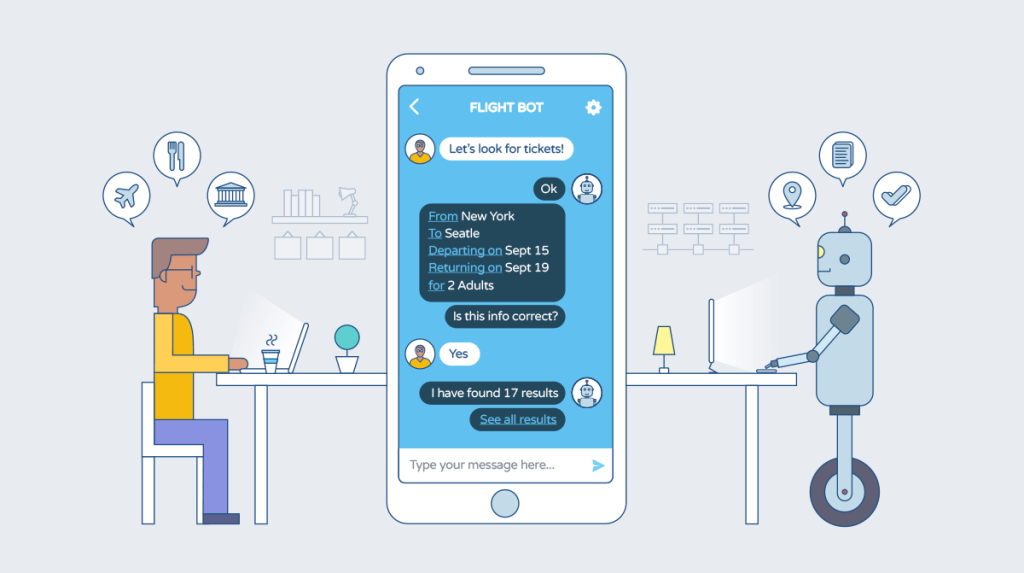

#**1- Data**

-------------------------------------------
MedQuAD: Medical Question Answering Dataset  
-------------------------------------------

-------------------------------------------
A Question answering system to help medicine students acquire theoretical knowledge 
-------------------------------------------



We included additional annotations in the XML files, that could be used for diverse IR and NLP tasks, such as the question type, the question focus, its syonyms, its UMLS Concept Unique Identifier (CUI) and Semantic Type. 
We  added the category of the question focus (Disease, Drug or Other) in the 4 MedlinePlus collections. All other collections are about diseases.  
 

Reference  
---------- 

If you use the MedQuAD dataset and/or the collection of 2,479 judged answers, please cite the following paper: "A Question-Entailment Approach to Question Answering". Asma Ben Abacha and Dina Demner-Fushman. BMC Bioinformatics, 2019.    


		   



## **1- Write a short description about the given dataset?** 

MedQuAD includes 47,457 medical question-answer pairs created from 12 NIH websites (e.g. cancer.gov, niddk.nih.gov, GARD, MedlinePlus Health Topics). The collection covers 37 question types (e.g. Treatment, Diagnosis, Side Effects) associated with diseases, drugs and other medical entities such as tests.  

##**2- Who provide the data ?**

Some data were scraped in order to get more examples for Qytpe-coarse:Drugs.

Dataset was constructed based on: "A Question-Entailment Approach to Question Answering". **Asma Ben Abacha** and Dina Demner-Fushman. arXiv:1901.08079 [cs.CL], January 2019.  

##**3- How they collected the data?** 

They collected them among many Sources :- 
                   

1.   ADAM
2.   MPlusDrugs
3.   MPlusHealthTopics
4.   CDC

and others ......




##**4-  What types of information are provided in the dataset ?**

It contains :-

1.  Questions
2.  Answers 
3.  Sources
4.  Question type
5.  URL
6.  Focus
7.  Qtype-Coarse

about medicine field .


##**5- What's the connection between provided dataset if multiple files exist ?**


The files have the same extension format **XML** and  data , But they are different in content because of the vareity of different sources.

# **2- EDA**

%Provide a general view of the dataset (# of records, # of columns, column types, # of questions/answers, # of image/video files, …)

%Provide statistics summary of important attributes (average, median, min, max, distribution plot…)

%Analyze quality of data, e.g., missing values for important fields (# of missing values, # of dummy values)

## 1- Import libraries and Read Dataset Csv file

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # statistical data visualization
sns.set()
import math   
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

#NLP
import re
!pip install -q nltk

import nltk 
from nltk.tokenize import  word_tokenize

nltk.download('punkt')

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('stem')
from nltk.stem import PorterStemmer

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# some seeting for pandas and hvplot

import missingno as msno

pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

#Models

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading stem: Package 'stem' not found in index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Load Data from kaggle dataset 

In [ ]:
# !pip install -q kaggle
!mkdir ~/.kaggle
from google.colab import files
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mahmoudadelkhorshed/da-project-medquad
!unzip /content/da-project-medquad.zip 

  0% 0.00/5.33M [00:00<?, ?B/s]
100% 5.33M/5.33M [00:00<00:00, 74.0MB/s]
Archive:  /content/da-project-medquad.zip
  inflating: Salama.csv              


Read loaded data

In [ ]:
data = pd.read_csv("/content/Salama.csv")


## 2- General view of the dataset 
(# of records, # of columns, column types, # of questions/answers)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47441 entries, 0 to 47440
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    47441 non-null  int64 
 1   Question      47441 non-null  object
 2   QType         47441 non-null  object
 3   Answer        47441 non-null  object
 4   source        47441 non-null  object
 5   url           47441 non-null  object
 6   Focus         47441 non-null  object
 7   Qtype-Coarse  21467 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.9+ MB


there are 8 columns[1 integer-7 objects] with 47441 observations 

In [ ]:
#print 5 rows
data.head()

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                       Question  \
0                                         What is (are) A guide to clinical trials for cancer ?   
1  what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   
2  what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   
3  what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   
4  what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   

         QType Answer source  \
0  information   None   ADAM   
1     research   None   ADAM   
2     research   None   ADAM   
3     research   None   ADAM   
4     research   None   ADAM   

                                                                       url  \
0  https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   
1  https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   
2  https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   
3  https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   
4  https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   

                                   Focus Qtype-Coarse  
0  A guide to clinical trials for cancer          NaN  
1  A guide to clinical trials for cancer          NaN  
2  A guide to clinical trials for cancer          NaN  
3  A guide to clinical trials for cancer          NaN  
4  A guide to clinical trials for cancer          NaN

It is an extra column,We should drop

In [ ]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)  

In [ ]:
print(f"Number of Records = {data.shape[0]}")
print(f"Number of Columns = {data.shape[1]}")

Number of Records = 47441
Number of Columns = 7


In [ ]:
# columns types
data.dtypes

Question        object
QType           object
Answer          object
source          object
url             object
Focus           object
Qtype-Coarse    object
dtype: object

All types of columns are object 

In [ ]:
print(f"Number of Questions = {data.shape[0]}")
print(f"Number of Answers = {data.shape[0]}")


Number of Questions = 47441
Number of Answers = 47441


##3- Analyze quality of data
 e.g., missing values for important fields (# of missing values, # of dummy values)

#### 3.1- Duplicated data

In [ ]:
print(data.duplicated().any())
print(data.duplicated().sum())
print("Duplicate Rows except first occurrence based on all columns are :")
data[data.duplicated()].head() # default keep = first

True
561
Duplicate Rows except first occurrence based on all columns are :


Question  \
2   what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   
3   what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   
4   what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   
47                                                               What to do for Abdominal mass ?   
54                                                               What to do for Abdominal pain ?   

             QType Answer source  \
2         research   None   ADAM   
3         research   None   ADAM   
4         research   None   ADAM   
47  considerations   None   ADAM   
54  considerations   None   ADAM   

                                                                        url  \
2   https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   
3   https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   
4   https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   
47              https://www.nlm.nih.gov/medlineplus/ency/article/003274.htm   
54              https://www.nlm.nih.gov/medlineplus/ency/article/003120.htm   

                                    Focus Qtype-Coarse  
2   A guide to clinical trials for cancer          NaN  
3   A guide to clinical trials for cancer          NaN  
4   A guide to clinical trials for cancer          NaN  
47                         Abdominal mass          NaN  
54                         Abdominal pain          NaN

In [ ]:
print(f"{round(data.duplicated().sum()*100/data.shape[0],3)} % ")

1.183 % 


**1- The number of duplicated rows  =  561 Rows . as a percentage of 1.18%**

**2- We need to drop the dublicated Rows .**

#### 3.2- Missing data with missingo library

In [ ]:
data.isnull().sum().sort_values(ascending=False)

Qtype-Coarse    25974
Question            0
QType               0
Answer              0
source              0
url                 0
Focus               0
dtype: int64

In [ ]:
data[data['Answer']=='None'].shape

(31034, 7)

- It is shown that there are no answers in many rows of data with
- **None** Value,
- None values = 30503  it is a huge number 
- So we will Replace it with null values to analyze them.

In [ ]:
data.replace('None',np.nan,inplace=True)

In [ ]:
data.isnull().sum().sort_values(ascending=False)

Answer          31034
Qtype-Coarse    25974
source              5
url                 5
Question            0
QType               0
Focus               0
dtype: int64

Now Null values appeared :-   

- Answer  = 30503

- Qtype-Coarse =   25470

##### 3.2.1- Visualize the missing data

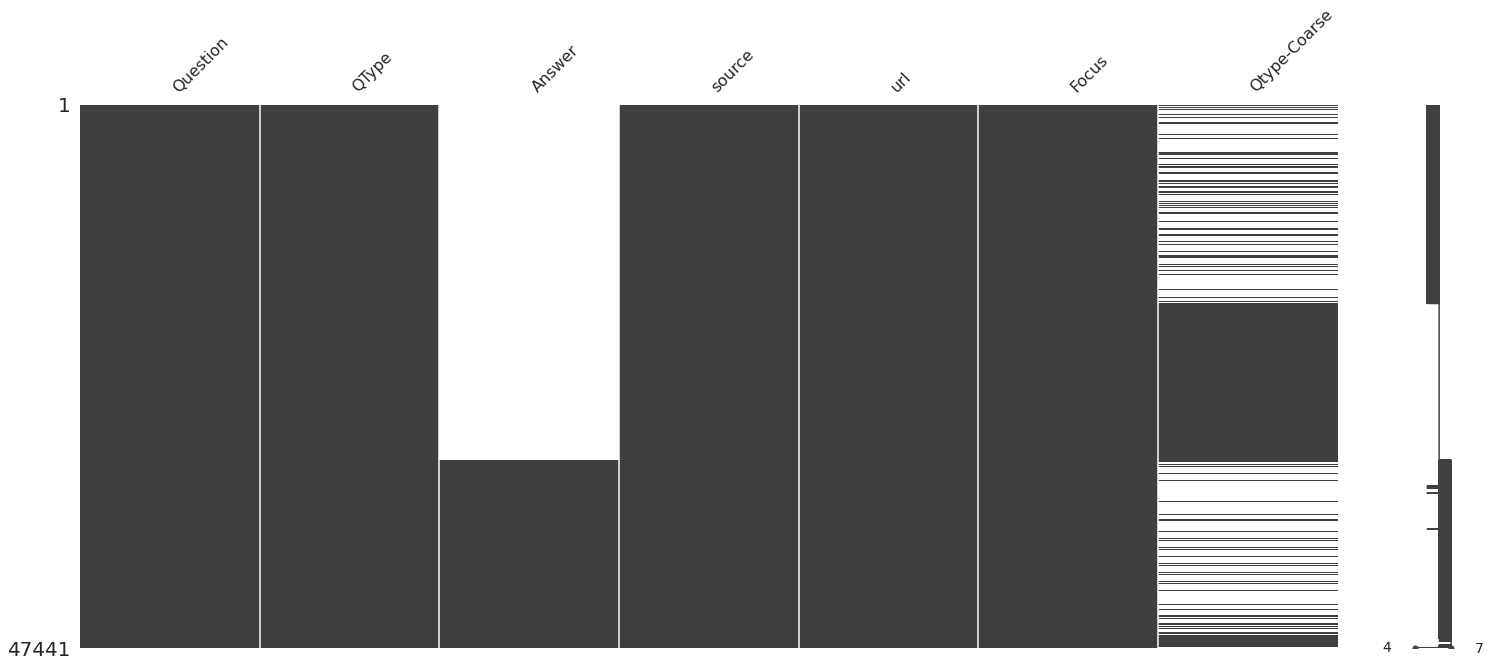

In [ ]:
msno.matrix(data);  #replace with data

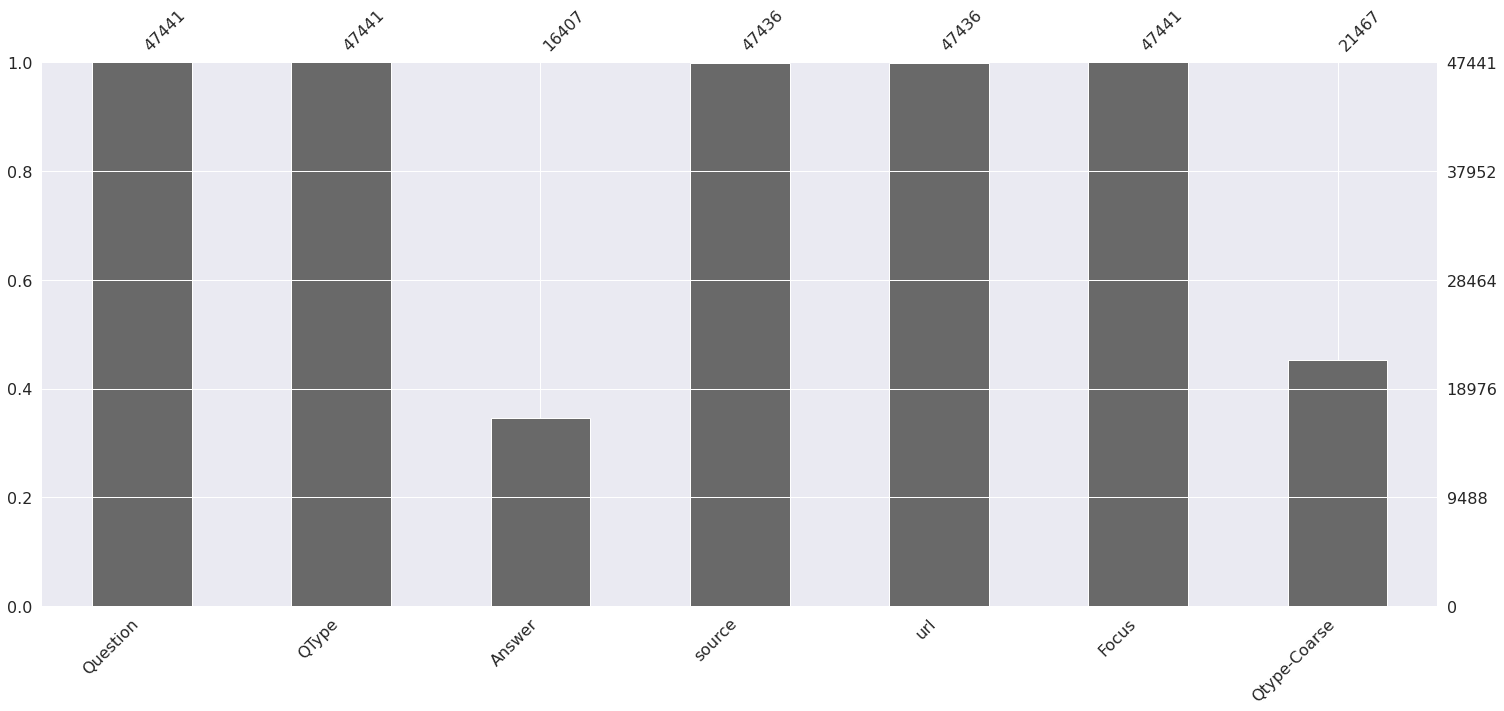

In [ ]:
msno.bar(data);

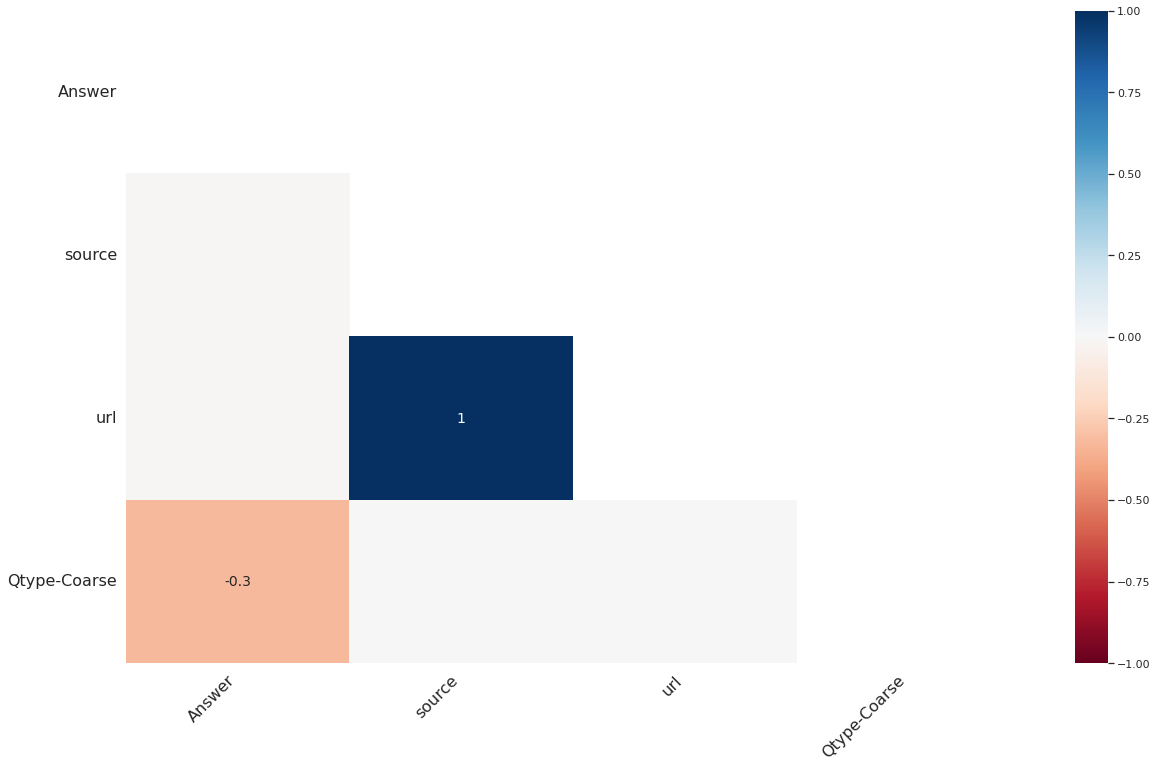

In [ ]:
msno.heatmap(data);

With this patterns the vision is not clear , We nedd more analysis.

##### **3.2.2- Analysis for missing values in Answers Column**

In [ ]:
data_Answer_null=data[data['Answer'].isnull()]  
List_null_sources=data_Answer_null['source'].unique()
print(f"Sources that have null answers: {List_null_sources}")
# Here we found 4 sources affect in missing answers 
# we found the 4 sources ['ADAM' 'MPlusDrugs' 'MPlusHerbsSupplements' 'GARD'] Affect in missing Answers 

Sources that have null answers: ['ADAM' 'MPlusDrugs' 'MPlusHerbsSupplements' 'GARD']


This is  because they are the biggest sources except {MPlusHerbsSupplements}

In [ ]:
List_null_sources=data_Answer_null['source'].unique()
List_null_sources

array(['ADAM', 'MPlusDrugs', 'MPlusHerbsSupplements', 'GARD'],
      dtype=object)

In [ ]:
# Here we sort columns by sources .
sorted = data.sort_values('source') # sort by sources
#  ADAM  - GARD - MPlusDrugs - MPlusHerbsSupplements



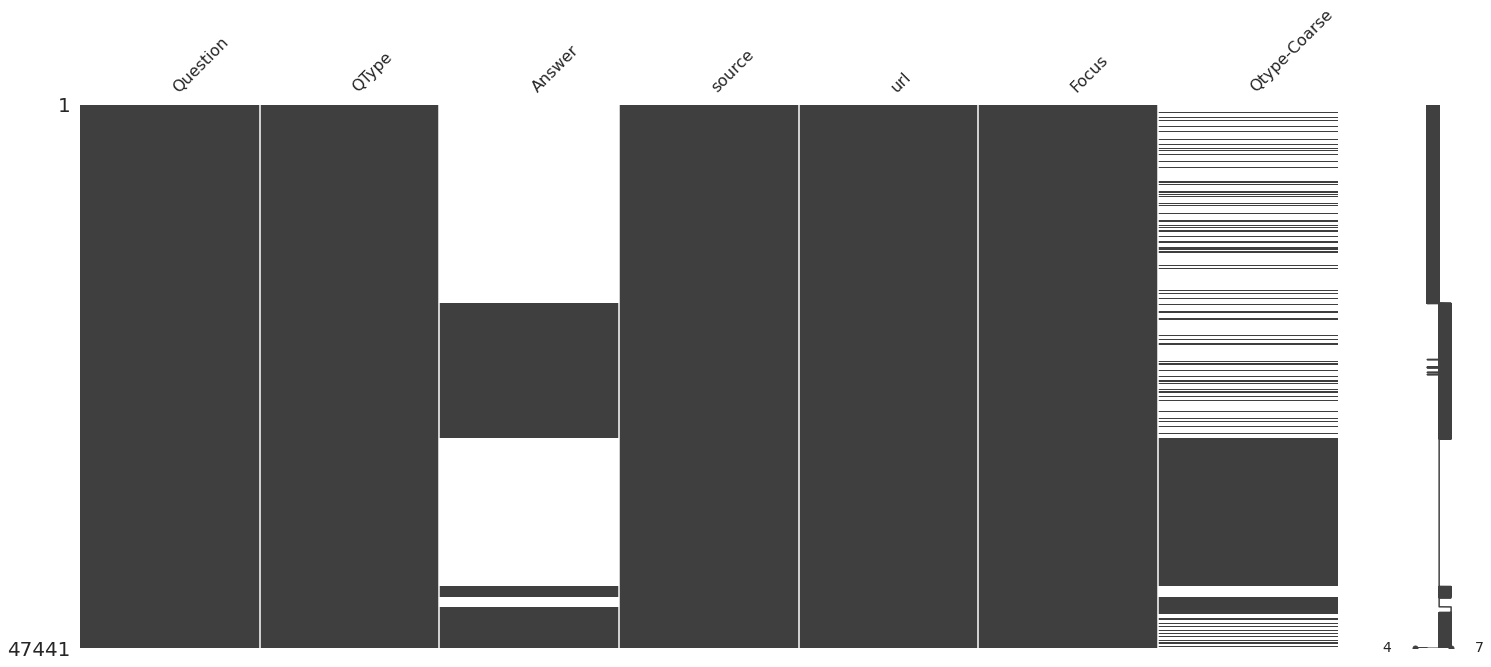

In [ ]:
msno.matrix(sorted)

**Conclusion:-**
- We found the 4 sources ['ADAM' 'MPlusDrugs' 'MPlusHerbsSupplements' 'GARD'] Affect in missing Answers .
- These resources didn't want to publish their **Answers** because of privacy .
- All missing values of **Answers** column here Type of **Missing at Random (MAR)** .



##### **3.2.3- Analysis for missing values in URL and Source Columns**

In [ ]:
# Here data to describe how the data are missed .
data[data['url'].isnull()] 

Question            QType  \
47389                What is (are) Parasites - Taeniasis ?      information   
47390          Who is at risk for Parasites - Taeniasis? ?   susceptibility   
47391              How to diagnose Parasites - Taeniasis ?  exams and tests   
47392  What are the treatments for Parasites - Taeniasis ?        treatment   
47393               How to prevent Parasites - Taeniasis ?       prevention   

                                                                                                    Answer  \
47389  Taeniasis in humans is a parasitic infection caused by the tapeworm species Taenia saginata (bee...   
47390  The tapeworms that cause taeniasis (Taenia saginata, T. solium, and T. asiatica) are found world...   
47391  Diagnosis of Taenia tapeworm infections is made by examination of stool samples; individuals sho...   
47392  Treatment is available after accurate diagnosis. Your doctor will provide prescription medicatio...   
47393  One way to prevent taeniasis is to cook meat to safe temperatures. A food thermometer should be ...   

      source  url                  Focus Qtype-Coarse  
47389    NaN  NaN  Parasites - Taeniasis          NaN  
47390    NaN  NaN  Parasites - Taeniasis          NaN  
47391    NaN  NaN  Parasites - Taeniasis        Tests  
47392    NaN  NaN  Parasites - Taeniasis        Drugs  
47393    NaN  NaN  Parasites - Taeniasis        Drugs

**Conclusion:-**

- **Source** and **Url** Columns are **missing not at random (mnar)**


##### **3.2.4- Analysis for missing values in Qtype-Coarse Column**

In [ ]:
data_Qtype_Coarse_null=data[data['Qtype-Coarse'].isnull()]
data_Qtype_Coarse_null.head()

Question  \
0                                         What is (are) A guide to clinical trials for cancer ?   
1  what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   
2  what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   
3  what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   
4  what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   

         QType Answer source  \
0  information    NaN   ADAM   
1     research    NaN   ADAM   
2     research    NaN   ADAM   
3     research    NaN   ADAM   
4     research    NaN   ADAM   

                                                                       url  \
0  https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   
1  https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   
2  https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   
3  https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   
4  https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   

                                   Focus Qtype-Coarse  
0  A guide to clinical trials for cancer          NaN  
1  A guide to clinical trials for cancer          NaN  
2  A guide to clinical trials for cancer          NaN  
3  A guide to clinical trials for cancer          NaN  
4  A guide to clinical trials for cancer          NaN

In [ ]:
data_Qtype_Coarse_null['source'].value_counts()

ADAM                 13361
GARD                  4536
GHR                   4344
MPlusHealthTopics      942
NIDDK                  875
NINDS                  775
CancerGov              538
NIHSeniorHealth        454
CDC                    142
NHLBI                    5
Name: source, dtype: int64

In [ ]:
data_Qtype_Coarse_null.shape

(25974, 7)

**Conclusion:-**

- data_Qtype_Coarse_null values  = 25470

- Sources that affect on those null values are multiple but the biggest 3 are  [ ADAM - GARD - GHR ]

- **Qtype-Coarse** Column is **missing at random (mar)**

- Affected by multiple columns ( **url** , **Focus** , **Question** )

**Full Conclusion**


1- More than half of **Answers** are nulls because it is **MAR** .
  * Many of resources has removed Answers because of **privacy** ['ADAM' 'MPlusDrugs' 'MPlusHerbsSupplements' 'GARD']
  *  Solution **Drop** empty **rows** of Answers  

2- Source and URl have **MNAR** pattern and 5 null values .
  *   If **URL** does not exist , So we could not get the **source** .
  *   Solution is to **drop** null values as they are **5** Rows . 

3- Qtype-Coarse Column is missing at random (mar)
 * Affected by multiple columns ( **url** , **Focus** , **Question** )
 * Solution 1 : Multiple Imputations .
 * Solution 2 : Drop Nans . 

## 4- Statistics summary of important attributes + Visualizations

(average, median, min, max, distribution plot…)


**Basic statistics of feature values**

In [ ]:
data.describe(include='object')

Question        QType  \
count                              47441        47441   
unique                             44603           39   
top     What causes Causes of Diabetes ?  information   
freq                                  20         9214   

                                                                                                     Answer  \
count                                                                                                 16407   
unique                                                                                                15817   
top     This condition is inherited in an autosomal recessive pattern, which means both copies of the ge...   
freq                                                                                                    348   

       source                                               url  \
count   47436                                             47436   
unique     12                                             11253   
top      ADAM  http://nihseniorhealth.gov/breastcancer/toc.html   
freq    17348                                                28   

                Focus Qtype-Coarse  
count           47441        21467  
unique          10537            3  
top     Breast Cancer        Drugs  
freq               53        18820

**Findings** :-

- The most freq **Question** is "What causes Causes of Diabetes ?	" with 20 times.

- Its type was information that indicates us people are interested in Inoformation not research or else.

- The most freq **Source** is ADAM that indicates us it is a great company that provides us with information.

- ADAM source has provide us with information more than **35%** .

- In Focus column 'Breast Cancer' title is repeated more than others with 53 times.

### 4.1- Distribution plot of  Source column .

We took all data observations.

In [ ]:
src_vals=data['source'].value_counts()
src_vals

ADAM                     17348
MPlusDrugs               12889
GHR                       5430
GARD                      5394
NIDDK                     1192
NINDS                     1088
MPlusHealthTopics          981
MPlusHerbsSupplements      792
NIHSeniorHealth            769
CancerGov                  729
NHLBI                      559
CDC                        265
Name: source, dtype: int64

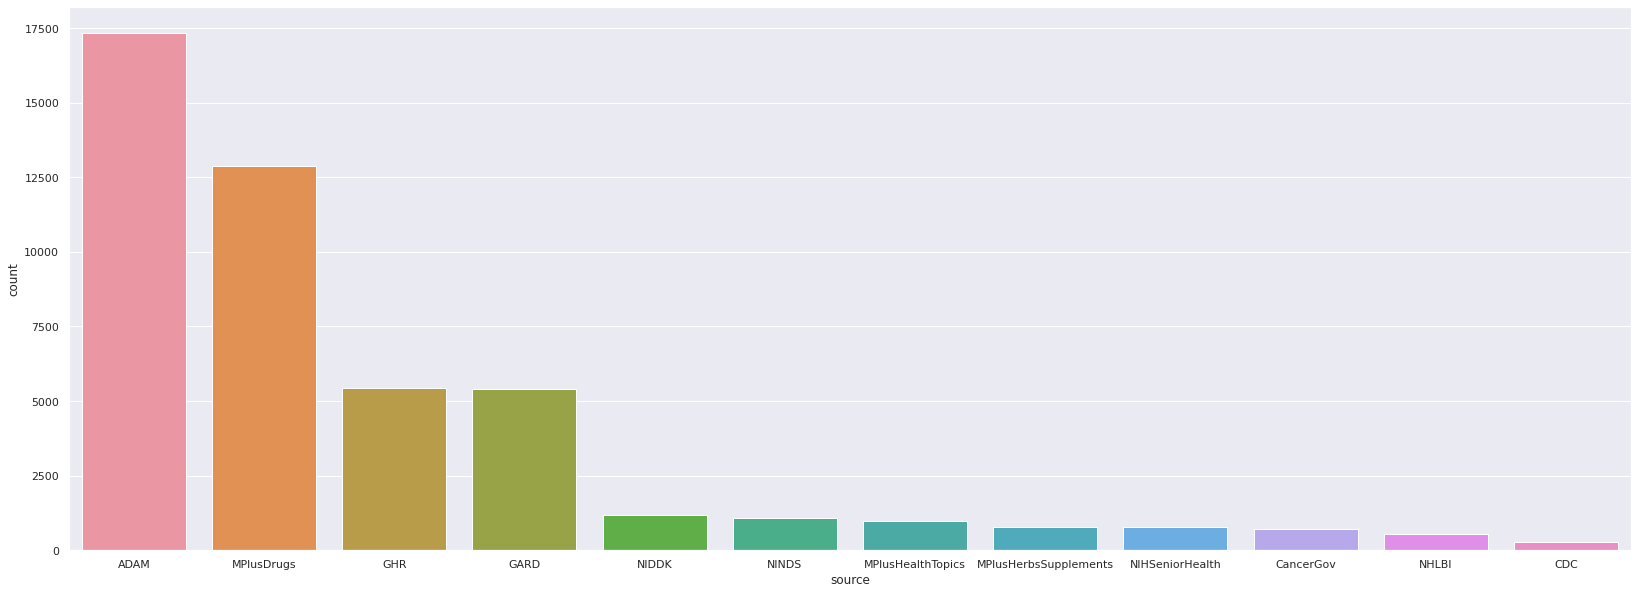

In [ ]:
sns.set_style("darkgrid")

sns.set(rc={'figure.figsize':(28,10)})
sns.countplot(x="source", data=data,order = data['source'].value_counts().index);



- ADAM and MPlusDrugs are the most freq sources.

### 4.2- Distribution plot of  Qtype with Source [ADAM] column .

We took a sample (**5000 observations**) from the data. 
As If we take all data , the insight will be not Readable.


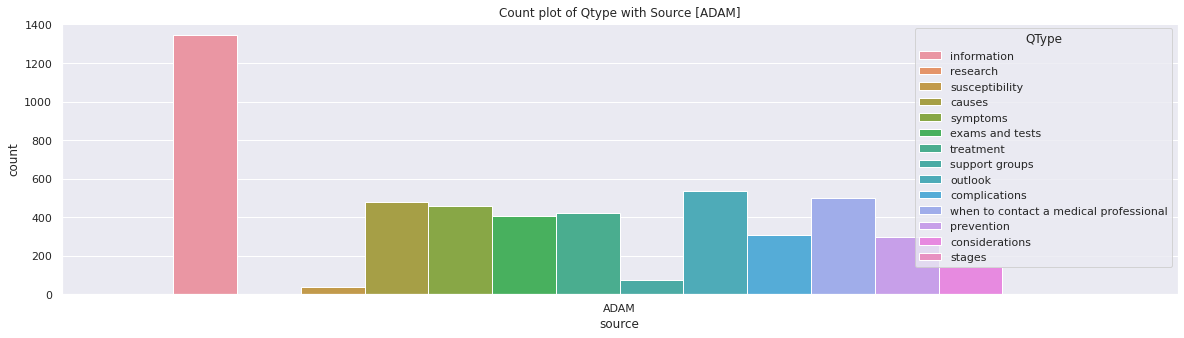

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(hue="QType",x='source', data=data[:5000]);
plt.title("Count plot of Qtype with Source [ADAM]");

- ADAM source provide us with at most infomarmation then equal count for the rest Qtype.

- But in Qtype(research,susceptibility) has almost nothing to provide.

### 4.3- Distribution plot of  Qtype-Coarse column .

We took all data observations.

In [ ]:
Qtype_Coarse_vals=data['Qtype-Coarse'].value_counts()
Qtype_Coarse_vals

Drugs      18820
Tests       2054
Disease      593
Name: Qtype-Coarse, dtype: int64

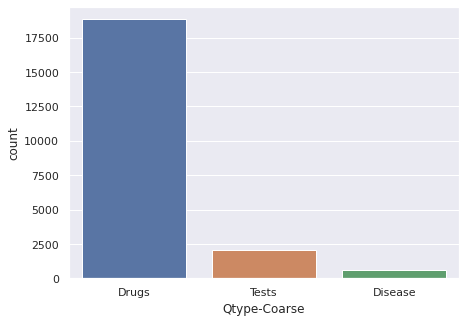

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x="Qtype-Coarse", data=data,order= data['Qtype-Coarse'].value_counts().index);

- As it is shown (Drugs has the biggest count in Qtype-coarse) as it is a classification for bad types.

### 4.4- Distribution plot of  Qtype column .



In [ ]:
# fig, ax = plt.subplots(figsize=(6,3), subplot_kw=dict(aspect="equal"))

# QType_vals = QType_vals[:7]
# labels=labels[:7]
# wedges, texts = ax.pie(QType_vals, wedgeprops=dict(width=0.5), startangle=-40)



# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
# kw = dict(arrowprops=dict(arrowstyle="-"),
#           bbox=bbox_props, zorder=0, va="center")

# for i, p in enumerate(wedges):
#     ang = (p.theta2 - p.theta1)/2. + p.theta1
#     y = np.sin(np.deg2rad(ang))
#     x = np.cos(np.deg2rad(ang))
#     horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#     connectionstyle = "angle,angleA=0,angleB={}".format(ang)
#     kw["arrowprops"].update({"connectionstyle": connectionstyle})
#     ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
#                 horizontalalignment=horizontalalignment, **kw)

# ax.set_title("Big 7 Question type")

# plt.show()

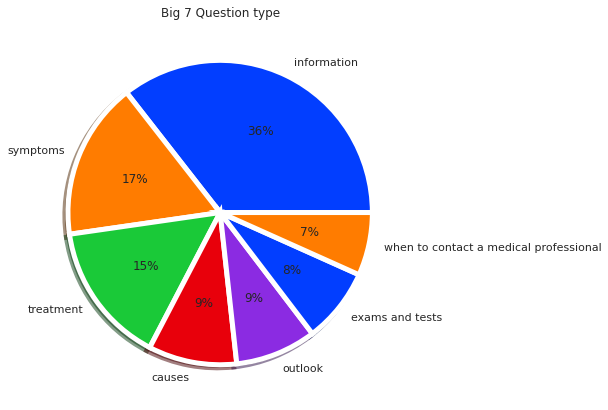

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
# sns.countplot(x="QType", data=data,orient="h",order= data['QType'].value_counts().index);

# x=data['QType'].unique()
# y=QType_vals
# plt.pie(x,labels=y)
# data.plot.pie(y='QType', figsize=(11, 6))
QType_vals=data['QType'].value_counts()

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]  #pastel
labels= data['QType'].value_counts().index
#create pie chart
plt.pie(QType_vals[:7], labels = labels[:7], colors = colors, autopct='%.0f%%',
        labeldistance=1.1,shadow =True,
        wedgeprops = {'linewidth': 5},
        # frame=True,
        )
plt.title("Big 7 Question type")
plt.show()


As I explained before Question type of information has a **36%** and in the second place (symptoms) with **17%** .

### **Process**

- We got the distribution plot for each columns using countplot Seaborn.


### **Conclusion** 


- We make Statistics summary for object columns , But we couldn't get mean or max or min and median because they are objects with string not numeric.

- There is no way of finding a mean from this data ,Because there isn't an "average" eye color. You can find the proportions, but not the mean or max or min and median. Hope this helps!

- But we successed in getting most frequent , top value and count for each column. 

# **3- PreProcessing**

## 3.1- drop duplicates 

In [ ]:
Data_pre_Dup=data.shape
Data_pre_Dup

(47441, 7)

In [ ]:
data.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [ ]:
Data_No_Dup=data.shape
Data_No_Dup

(46880, 7)

In [ ]:
print(f"Number of removed duplicates row = {Data_pre_Dup[0]-Data_No_Dup[0]}  with precentage = {round((Data_pre_Dup[0]-Data_No_Dup[0])*100/Data_pre_Dup[0],2)} % ")

Number of removed duplicates row = 561  with precentage = 1.18 % 


## 3.2- Drop unsed columns 

We are interested in specific columns for our model 
like 

- Question


- source

- QType

So we could remove other columns 

In the first version of the code,We removed answers mising values ,but it reduces data by 64% and answer column wouldn't affect on the data because we wouldn't use it

In [ ]:
#Take a copy for Question 1 Hypothesis
analysis=data.copy()


In [ ]:
Preprocessed_data = data[['Question','source','QType']]

In [ ]:
Preprocessed_data.shape

(46880, 3)

In [ ]:
Preprocessed_data.head()

Question  \
0                                         What is (are) A guide to clinical trials for cancer ?   
1  what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   
2                                      Do you have information about A guide to herbal remedies   
3                                                                      What is (are) A1C test ?   
4                                                                Who is at risk for A1C test? ?   

  source           QType  
0   ADAM     information  
1   ADAM        research  
2   ADAM     information  
3   ADAM     information  
4   ADAM  susceptibility

## 3.3- Drop null values

In [ ]:
Preprocessed_data.isnull().sum().sort_values(ascending=False)


source      5
Question    0
QType       0
dtype: int64

In [ ]:
print(f"Shape of Data after removing null values from Answers : {Preprocessed_data.shape[0]}  Rows")

Shape of Data after removing null values from Answers : 46880  Rows


## 3.4 Convert dtypes


In [ ]:
#convert all object columns to string column
Preprocessed_data[Preprocessed_data.select_dtypes(['object']).columns] = Preprocessed_data.select_dtypes(['object']).apply(lambda x: x.astype('string'))
Preprocessed_data.info()  #to check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46880 entries, 0 to 46879
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  46880 non-null  string
 1   source    46875 non-null  string
 2   QType     46880 non-null  string
dtypes: string(3)
memory usage: 1.1 MB


## 3.5 Solve un-balanced data

### 3.5.1 Source Column

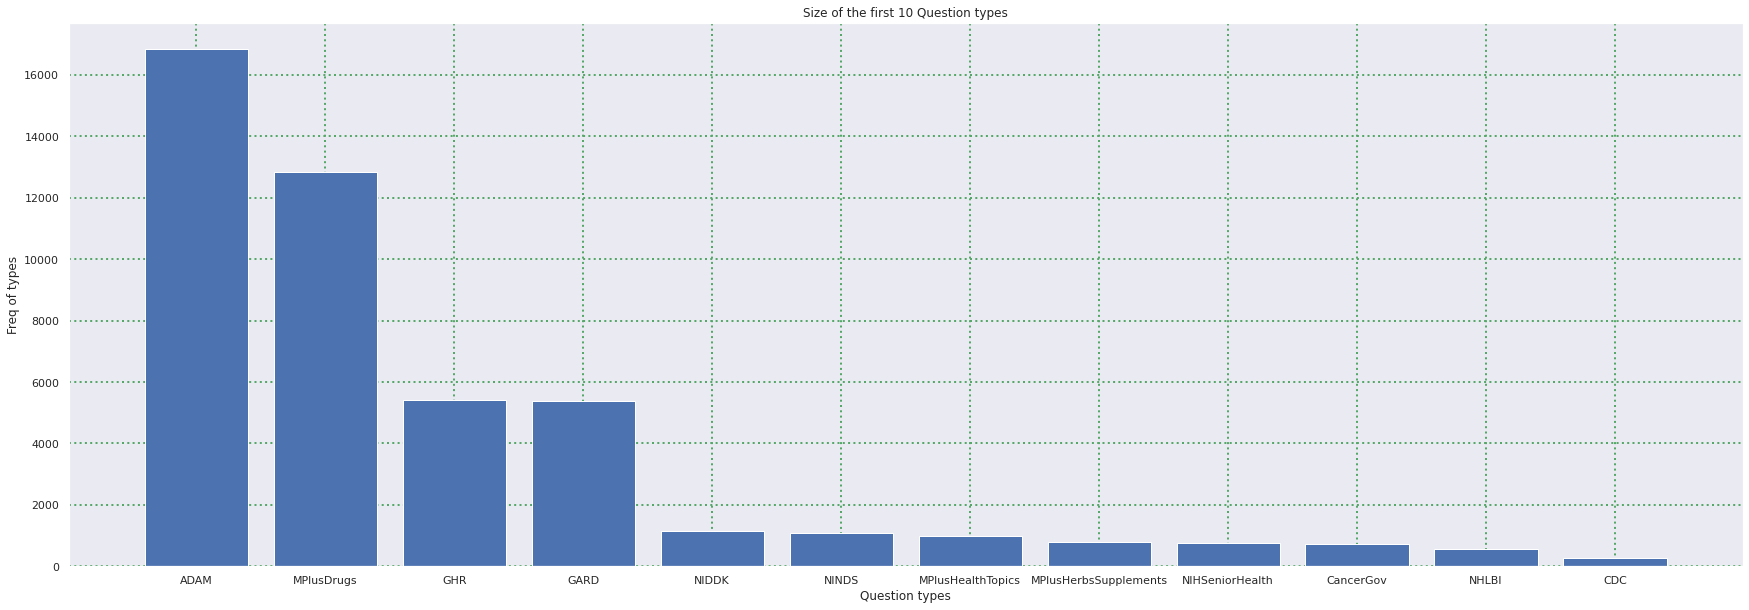

In [ ]:
#Count plot match
plt.figure(figsize=(30,10))
src_vals=Preprocessed_data['source'].value_counts()
src_Labels=Preprocessed_data['source'].value_counts().index

plt.bar(height=src_vals,x=src_Labels);
plt.xlabel("Question types");
plt.ylabel("Freq of types") ; 
plt.grid(color='g', linestyle=':', linewidth=2)
plt.title("Size of the first 10 Question types") ;  

# ax = sns.countplot(x="QType", data=Preprocessed_data)
plt.show()

We notice here a big differnce ,As our missing analysis in **3.2.2**.
Our results proved that there are 4 sources didn't share their answers.
That was the big reason for missing data.
After we removed missing values in Answer column.

####Findings

- The statistics are changed now to two main sources and other sources with small contributions.

### 3.5.2 QType Column

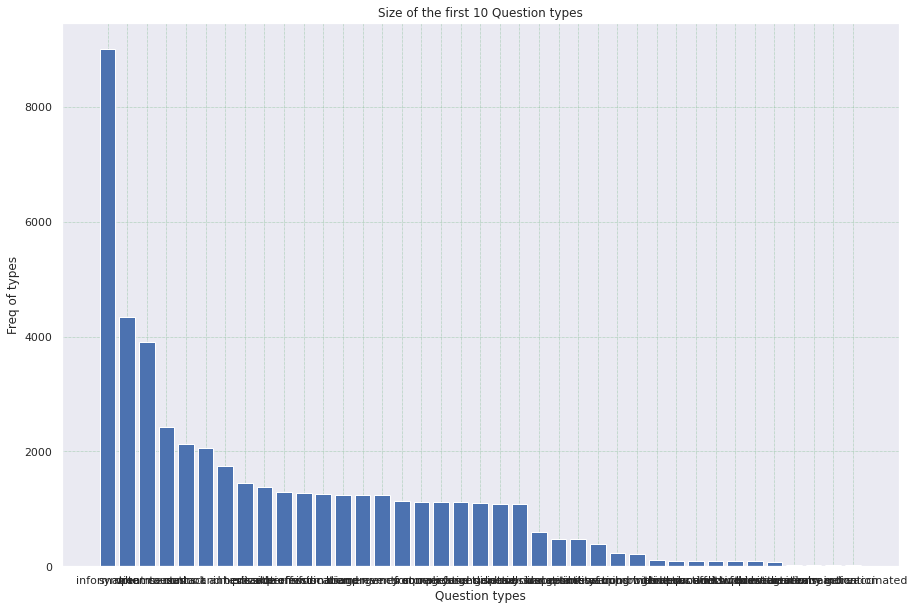

In [ ]:
#Count plot match
plt.figure(figsize=(15,10))
Q_vals=Preprocessed_data['QType'].value_counts()
Q_Labels=Preprocessed_data['QType'].value_counts().index

plt.bar(height=Q_vals,x=Q_Labels);
plt.xlabel("Question types");
plt.ylabel("Freq of types") ; 
plt.grid(color='g', linestyle=':', linewidth=0.5)
plt.title("Size of the first 10 Question types") ;  

# ax = sns.countplot(x="QType", data=Preprocessed_data)
plt.show()

We notice here a big differnce ,As our missing analysis in **3.2.2**.
Our results proved that there are 4 sources didn't share their answers.
That was the big reason for missing data.
After we removed missing values in Answer column.

####Findings

- The statistics are changed now to two main sources and other sources with small contributions.

# **4- Feature engineering** 

## 4.1 Remove outlier

In [ ]:
'''
This Function For remove OutLiers
'''
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
try :
    try_data=remove_outlier(Preprocessed_data,'source')
except : 
   print("there is no numerical Data to remove outlier ")

there is no numerical Data to remove outlier 


In [ ]:
Preprocessed_data['QType'].value_counts()

information                                9013
symptoms                                   4334
treatment                                  3899
causes                                     2428
outlook                                    2128
exams and tests                            2053
when to contact a medical professional     1738
inheritance                                1446
precautions                                1379
side effects                               1301
other information                          1280
indication                                 1258
usage                                      1244
brand names                                1238
prevention                                 1237
emergency or overdose                      1140
frequency                                  1120
complications                              1120
storage and disposal                       1117
forget a dose                              1098
dietary                                 

There is no numerical Data to remove outlier 


## 4.2 Feature Categorical Encoding

Categorical encoding is the technique used to encode categorical features into numerical values which are usually simpler for an algorithm to understand.

In [ ]:
classes_Qtype = Preprocessed_data['QType'].unique()
classes_source = Preprocessed_data['source'].unique()
print(classes_source)
print(classes_Qtype)


<StringArray>
[                 'ADAM',            'MPlusDrugs', 'MPlusHerbsSupplements',
             'CancerGov',                  'GARD',                   'GHR',
     'MPlusHealthTopics',                 'NIDDK',                 'NINDS',
       'NIHSeniorHealth',                 'NHLBI',                   'CDC',
                    <NA>]
Length: 13, dtype: string
<StringArray>
[                            'information',
                                'research',
                          'susceptibility',
                                  'causes',
                                'symptoms',
                         'exams and tests',
                               'treatment',
                          'support groups',
                                 'outlook',
                           'complications',
  'when to contact a medical professional',
                              'prevention',
                          'considerations',
                                  'stages',


there is NA data in source column, We will remove it in noise data part


In [ ]:
Preprocessed_data.dtypes

Question    string
source      string
QType       string
dtype: object

In [ ]:
#ASSign to category type with labels:
Preprocessed_data['source'] = Preprocessed_data['source'].astype('category').cat.codes
Preprocessed_data['QType'] = Preprocessed_data['QType'].astype('category').cat.codes

# get the total number of unique outputs (later used for prediction)
len_QType = len(Preprocessed_data.QType.unique())
len_source = len(Preprocessed_data.source.unique())

In [ ]:
print(f"Number of unique values in Qtype = {len_QType}  \nNumber of unique values in Sources = {len_source}")


Number of unique values in Qtype = 39  
Number of unique values in Sources = 13


In [ ]:
Preprocessed_data.head()

Question  \
0                                         What is (are) A guide to clinical trials for cancer ?   
1  what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   
2                                      Do you have information about A guide to herbal remedies   
3                                                                      What is (are) A1C test ?   
4                                                                Who is at risk for A1C test? ?   

   source  QType  
0       0     18  
1       0     27  
2       0     18  
3       0     18  
4       0     33

In [ ]:
Preprocessed_data.dtypes

Question    string
source        int8
QType         int8
dtype: object

## 4.3 Remove noise data


In [ ]:
Preprocessed_data['source'].value_counts()

 0     16860
 5     12846
 4      5430
 3      5394
 9      1162
 11     1088
 6       981
 7       792
 10      769
 2       729
 8       559
 1       265
-1         5
Name: source, dtype: int64

It is obvious that there is label = -1  , So it will raise error while training, so we should replace it with label 9

In [ ]:
Preprocessed_data[Preprocessed_data['source'] == -1]

Question  source  QType
46828                What is (are) Parasites - Taeniasis ?      -1     18
46829          Who is at risk for Parasites - Taeniasis? ?      -1     33
46830              How to diagnose Parasites - Taeniasis ?      -1      9
46831  What are the treatments for Parasites - Taeniasis ?      -1     35
46832               How to prevent Parasites - Taeniasis ?      -1     26

In [ ]:
Preprocessed_data['source'] = Preprocessed_data['source'].replace([-1],[9])


In [ ]:
Preprocessed_data[Preprocessed_data['source'] == 9]

Question  source  QType
43032                           What is (are) Acromegaly ?       9     18
43033                What are the symptoms of Acromegaly ?       9     34
43034                             What causes Acromegaly ?       9      2
43035         How many people are affected by Acromegaly ?       9     11
43036                         How to diagnose Acromegaly ?       9      9
...                                                    ...     ...    ...
46828                What is (are) Parasites - Taeniasis ?       9     18
46829          Who is at risk for Parasites - Taeniasis? ?       9     33
46830              How to diagnose Parasites - Taeniasis ?       9      9
46831  What are the treatments for Parasites - Taeniasis ?       9     35
46832               How to prevent Parasites - Taeniasis ?       9     26

[1167 rows x 3 columns]

## 4.4 Clean_Text (Preprocessing)

Stemming  - Lemmatization  - Tokenizer - Word-Vec embedding

In [ ]:
%%time
"""
  For ENGlish Language  PorterStammer or LancasterStammer
  PorterStemmer uses Suffix Stripping ,
  PorterStemmer is known for its simplicity and speed.
""" 

Porter = PorterStemmer()

"""
 these words are filtered out from search queries because
  they return a vast amount of unnecessary information.
"""  

stop_words = set(stopwords.words("english"))  #get the stop words and set ( unique them)

"""
Lemmatization, unlike Stemming, reduces the inflected words properly
 ensuring that the root word belongs to the language.
 it is used where it is necessary to get valid words.
            WordNet Lemmatizer

"""
#Lemmatization

wordnet = WordNetLemmatizer()


CPU times: user 2.18 ms, sys: 0 ns, total: 2.18 ms
Wall time: 2.19 ms


In [ ]:
def preprocess_text(text,Stemmer=Porter,Lemmatization=False):
    """
    Arguments = 
    Stemmer = [Porter]
     steps:
        - remove any html tags (< /br> often found)
        - Remove ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
           if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    Return clean text    
    """
    # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>",re.IGNORECASE)
    RE_ASCII = re.compile(r"[^A-Za-z]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)

    

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)    
    words_tokens_lower = [word.lower() for word in word_tokens]  # Tokenize

    if Lemmatization==False:
        words_filtered = [
            Stemmer.stem(word) for word in words_tokens_lower if word not in stop_words]
    else:
        words_filtered = [
            wordnet.lemmatize(word, pos="v") for word in words_tokens_lower if word not in stop_words]
                    # parts-of-speech (POS) tagging.  v = Verbs >> (leaves = Leave) 

    text_clean = " ".join(words_filtered)
    return text_clean

Evaluate Clean Function

In [ ]:
%%time
# Clean text
Preprocessed_data["Question_Clean"] = Preprocessed_data["Question"].map(
    lambda x: preprocess_text(x,Stemmer=Porter,Lemmatization=False) if isinstance(x, str) else x # if x STR >> clean data by function
)
# Preprocessed_data["Answer_Clean"] = Preprocessed_data["Answer"].map(
#     lambda x: preprocess_text(x,Stemmer=Porter,Lemmatization=False) if isinstance(x, str) else x # if x STR >> clean data by function
# )
#print shape of data
print(Preprocessed_data.shape)

(46880, 4)
CPU times: user 22.9 s, sys: 151 ms, total: 23 s
Wall time: 30.8 s


In [ ]:
Preprocessed_data.head()

Question  \
0                                         What is (are) A guide to clinical trials for cancer ?   
1  what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   
2                                      Do you have information about A guide to herbal remedies   
3                                                                      What is (are) A1C test ?   
4                                                                Who is at risk for A1C test? ?   

   source  QType                                       Question_Clean  
0       0     18                             guid clinic trial cancer  
1       0     27  research clinic trial done guid clinic trial cancer  
2       0     18                            inform guid herbal remedi  
3       0     18                                                 test  
4       0     33                                            risk test

## 4.5 Splitting Data

I have tried to split at **ratio= 20%**,it get almost avg accuracy on all models = 97 % 

but I will try another **ratio = 35 %**





In [ ]:
# split data (training/testing set)
data_train, data_test = train_test_split(Preprocessed_data, test_size=0.35, random_state=10)

print(f"Rows number of train data = {data_train.shape[0]} \nRows number of test data = {data_test.shape[0]} ")

Rows number of train data = 30472 
Rows number of test data = 16408 


In [ ]:
# prepare y-train
y_train_Qtype=data_train['QType']
y_train_source=data_train['source']

In [ ]:
#prepare test data
x_test_text= data_test['Question_Clean']

y_test_Qtype=data_test['QType']
y_test_source=data_test['source']



## 4.6 Preprocessing for text data using Deep learning and tensor flow libarires.

Since the messages (text) in the dataset are of varying length, therefore we will use padding to make all the messages have the same length. We can use the maximum sequence length to pad the messages. However, we can also have a look at the distribution of the sequence lengths in the train set to find the right padding length.

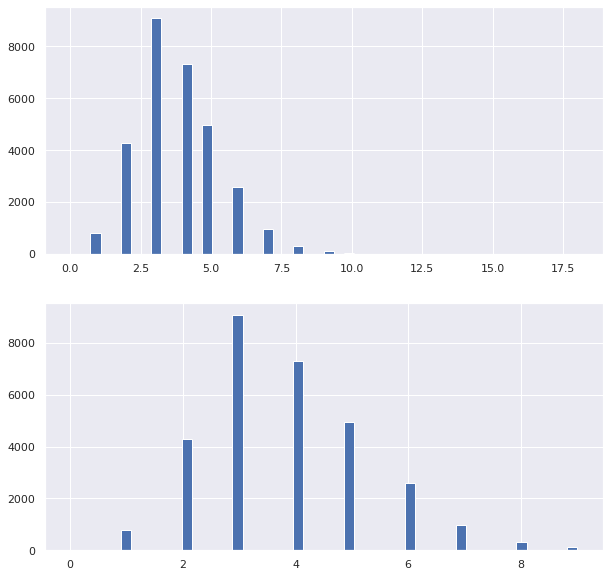

In [ ]:
# get length of all the messages in the train set
plt.figure(figsize=(10,10))
seq_len = [len(i.split()) for i in data_train['Question_Clean']]  #count words
plt.subplot(2,1,1)
pd.Series(seq_len).hist(bins = 50); #all counts
seq_len=[item for item in seq_len if item<10]
plt.subplot(2,1,2)
pd.Series(seq_len).hist(bins = 50);  # until 100 counts

We can clearly see that most of the messages have a length of **3 in image 2 words** or less. Whereas the **maximum length is 10 in image 1**. So, if we select 10 as the padding length then all the input sequences will have length 200 and most of the tokens in those sequences will be padding tokens which are not going to help the model learn anything useful and on top of that, it will make the training slower.

Therefore, we will set **8** as the padding length to be in safe choice.

In [ ]:
# !pip install -q tensorflow

In [ ]:
# preprocess text data
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint
import tensorflow as tf

vocab_size = 11000
max_len = 8  #after the deep analysis it is the optimal

# loading Questions:
x_train_text = data_train['Question_Clean']


# i tried more than 1 hour to remove stopwords unless i read that

# >>>>>>>>   https://tinyurl.com/not-remove-stop-embedding    <<<<<<<<

# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)  #similar to tf-idf

tokenizer.fit_on_texts(x_train_text)

"""
Transforms each text in texts to a sequence of integers.
Only top num_words-1 most frequent words will be taken into account. 
Only words known by the tokenizer will be taken into account.
"""

def preprocess_Embedding(list_of_text):
    return pad_sequences(tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post',
        truncating='post'
    )
"""
pad_sequences transforms a list (of length num_samples) 
of sequences (lists of integers) into a 2D Numpy array of
shape (num_samples, num_timesteps). num_timesteps is either 
the maxlen argument if provided,
or the length of the longest sequence in the list.
"""    

# padding is done inside: 
x_train_text_id = preprocess_Embedding(x_train_text)

print(x_train_text_id.shape)

(30472, 8)


In [ ]:
# we can use the tokenizer to convert IDs to words.
pprint(tokenizer.sequences_to_texts(x_train_text_id[:10]))

['hypersensit vascul',
 'forget dose nitroglycerin spray',
 'safeti concern special precaut brentuximab vedotin inject',
 'symptom wasp sting',
 'symptom hyper igd syndrom',
 'genet chang relat potassium aggrav myotonia',
 'inform know dextroamphetamin amphetamin',
 'forget dose pseudoephedrin',
 'treatment cholesteryl ester storag diseas',
 'inform ham test']


In [ ]:
for i in range(10):
  print(x_train_text_id[i])
  print("\n")

[802 608   0   0   0   0   0   0]


[ 38  36 376  94   0   0   0   0]


[  19   21    7   22 2578 2579    8    0]


[   2 4250  646    0    0    0    0    0]


[   2  746 4251    1    0    0    0    0]


[  42   37   29  225 3682  577    0    0]


[  4   5 936 803   0   0   0   0]


[ 38  36 804   0   0   0   0   0]


[   3 3683 3684   32    9    0    0    0]


[   4 5288   81    0    0    0    0    0]




In [ ]:
print('total words in the dictionary:', tokenizer.num_words)

total words in the dictionary: 11000


# **5-Building Models**

##1- Basic Neural Network 

##2-  BiDirectional RNN with LSTM Model

##3-  GRU Model

## **1- Basic Neural network model**

  -  only 1 Dense Layer

## Accuracy = 98 %

### Model Architecture

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 embedding (Embedding)       (None, 8, 100)            1100000   
                                                                 
 tf.math.reduce_mean (TFOpLa  (None, 100)              0         
 mbda)                                                           
                                                                 
 Qtype (Dense)               (None, 39)                3939      
                                                                 
Total params: 1,103,939
Trainable params: 1,103,939
Non-trainable params: 0
_________________________________________________________________


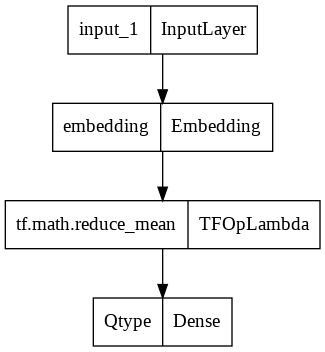

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam,Nadam
from tensorflow.keras.utils import plot_model
from keras import backend as K 
K.clear_session() #Restart seed = 0

# here we have  text input.
in_text = keras.Input(batch_shape=(None, max_len))


# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)




# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_Qtype = Dense(len_QType, activation='softmax', name='Qtype')(averaged)
p_source = Dense(len_source, activation='softmax', name='source')(averaged)

 


# define model input/output using keys.
model = keras.Model(
    inputs={
        'Question_clean': in_text,
            },
    outputs={
        'Qtype': p_Qtype,
        # 'Source': p_source,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Nadam(),

    loss={
        'Qtype': 'sparse_categorical_crossentropy',
        # 'Source': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'Qtype': 1,
        # 'Source': 0.5,       
    },
    metrics={
        'Qtype': ['SparseCategoricalAccuracy'],
        # 'Source': ['SparseCategoricalAccuracy'],
    },
)


# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='Embedding Questio+NN.png')

### Model Training

Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
# y_train_Qtype=data_train['QType']
# y_train_source=data_train['source']


In [ ]:
%%time
tf.debugging.set_log_device_placement(True)
history = model.fit(
    x={
        'Question_clean': x_train_text_id,
        },
    y={
        'Qtype': y_train_Qtype,
        # 'Source': y_train_source,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, )  # val_Qtype_loss
    ],
    verbose=1
)

Epoch 1/20
1524/1524 [==============================] - 14s 6ms/step - loss: 1.2928 - sparse_categorical_accuracy: 0.7015 - val_loss: 0.2919 - val_sparse_categorical_accuracy: 0.9527
Epoch 2/20
1524/1524 [==============================] - 10s 6ms/step - loss: 0.1696 - sparse_categorical_accuracy: 0.9696 - val_loss: 0.1361 - val_sparse_categorical_accuracy: 0.9721
Epoch 3/20
1524/1524 [==============================] - 10s 6ms/step - loss: 0.0934 - sparse_categorical_accuracy: 0.9793 - val_loss: 0.0991 - val_sparse_categorical_accuracy: 0.9774
Epoch 4/20
1524/1524 [==============================] - 9s 6ms/step - loss: 0.0671 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0825 - val_sparse_categorical_accuracy: 0.9790
Epoch 5/20
1524/1524 [==============================] - 9s 6ms/step - loss: 0.0534 - sparse_categorical_accuracy: 0.9849 - val_loss: 0.0752 - val_sparse_categorical_accuracy: 0.9805
Epoch 6/20
1524/1524 [==============================] - 9s 6ms/step - loss: 0.0447 - sp

### Data Preprocessing (Testing)

Here we use the trained tokenizer to pre-process the testing set.

In [ ]:
#prepare test data
# Repeated
# x_test_text= data_test['Question_Clean']

# y_test_Qtype=data_test['QType']
# y_test_source=data_test['source']

In [ ]:
x_test_text.shape

(16408,)

In [ ]:
x_test_text_id = preprocess_Embedding(x_test_text)

In [ ]:
x_test_text_id

array([[3955,    1,    0, ...,    0,    0,    0],
       [   2,   76,   46, ...,    0,    0,    0],
       [3430,  202,   18, ...,    0,    0,    0],
       ...,
       [  38,   36, 2872, ...,    0,    0,    0],
       [  11, 3127,  409, ...,    0,    0,    0],
       [ 136, 2681,    8, ...,    0,    0,    0]], dtype=int32)

### Prediction

We can use the model to predict the testing samples.

In [ ]:
# we can do prediction on training set
y_predict = model.predict(x_test_text_id) #one input


# probabilities
Qtype_predicted = y_predict['Qtype']
print(Qtype_predicted)

# categories
Qtype_category_predicted = np.argmax(Qtype_predicted, axis=1)
print(Qtype_category_predicted)


[[1.46429784e-07 2.78108447e-09 5.99388950e-05 ... 3.17654340e-11
  2.28472118e-07 6.94484652e-06]
 [1.29263658e-08 2.32392369e-11 1.00783595e-08 ... 1.82704828e-12
  2.44868192e-09 9.96478704e-08]
 [5.63921398e-09 5.19762500e-09 5.76447746e-07 ... 3.85761735e-11
  3.37628911e-08 2.29173111e-07]
 ...
 [2.09587139e-11 3.53209662e-09 5.77629500e-09 ... 2.99132004e-11
  2.41683368e-10 1.13141185e-08]
 [1.56614066e-09 1.92583394e-10 9.81494210e-08 ... 6.24917965e-11
  1.72226304e-08 3.48116416e-08]
 [1.93032760e-11 3.11749622e-13 3.24131514e-15 ... 9.99999523e-01
  6.79755528e-14 7.16133628e-14]]
[18 34 19 ... 10  9 36]


### Visualization

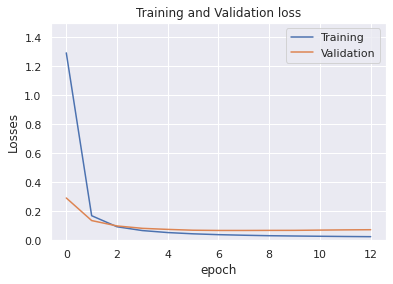

In [ ]:
def plot_loss_Acc(losstype,val_losstype,Type):
    """
    type = loss , accuracy
    """
    history.history.keys()
    %matplotlib inline
    plt.plot(history.history[losstype])  #Qtype_loss  'loss'
    plt.plot(history.history[val_losstype])  #val_Qtype_loss   'val_loss'
    plt.legend(['Training', 'Validation'])
    plt.title('Training and Validation '+Type)
    plt.xlabel('epoch')
    plt.ylabel('Losses')
    plt.ylim(0,1.5)

plot_loss_Acc(losstype='loss',val_losstype='val_loss',Type='loss')

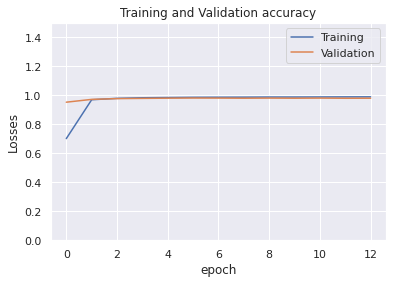

In [ ]:
plot_loss_Acc(losstype='sparse_categorical_accuracy',val_losstype='val_sparse_categorical_accuracy',Type='accuracy')

There is a **`well-fitting`** because of no gab between train and validation

using this ref :

https://dagshub.com/raduga256/Text-Classification-with-NLP-Tf-Idf-vs-Word2Vec-vs-BERT/src/main/news_category_classification.ipynb

In [ ]:
print(classes_source)
print(classes_Qtype)

<StringArray>
[                 'ADAM',            'MPlusDrugs', 'MPlusHerbsSupplements',
             'CancerGov',                  'GARD',                   'GHR',
     'MPlusHealthTopics',                 'NIDDK',                 'NINDS',
       'NIHSeniorHealth',                 'NHLBI',                   'CDC',
                    <NA>]
Length: 13, dtype: string
<StringArray>
[                            'information',
                                'research',
                          'susceptibility',
                                  'causes',
                                'symptoms',
                         'exams and tests',
                               'treatment',
                          'support groups',
                                 'outlook',
                           'complications',
  'when to contact a medical professional',
                              'prevention',
                          'considerations',
                                  'stages',


Accuracy :  0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00        68
           2       0.99      1.00      1.00       832
           3       1.00      1.00      1.00       373
           4       0.18      0.09      0.12       219
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00       404
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00       411
           9       1.00      1.00      1.00       732
          10       1.00      1.00      1.00       365
          11       1.00      1.00      1.00       400
          12       1.00      1.00      1.00       386
          13       1.00      0.80      0.89        10
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        45
          16       1.00      1.00      1.00       163
          

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

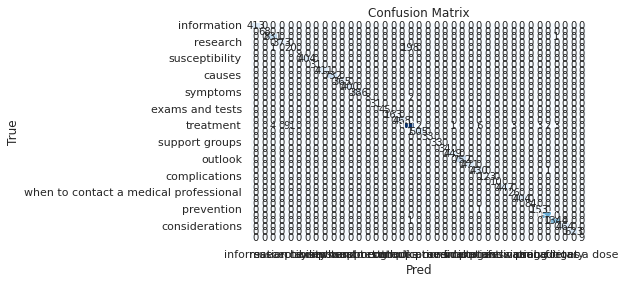

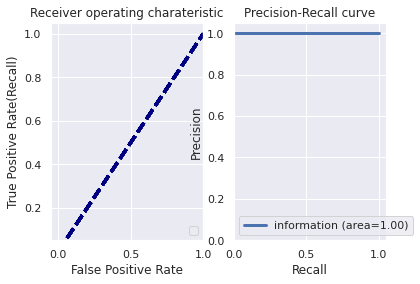

In [ ]:
from sklearn import metrics
# Q_type.values categories

classes = classes_Qtype[:-1]
y_test_array = pd.get_dummies(y_test_Qtype, drop_first=False).values

## Accuracy, Precision, Recall
y_test = y_test_Qtype
y_test=np.asarray(y_test)
predicted = Qtype_category_predicted
predicted_prob = Qtype_predicted
accuracy = metrics.accuracy_score(y_test, predicted)
# auc = metrics.roc_auc_score(list(y_test), Qtype_category_predicted, multi_class="ovr")

print("Accuracy : ", round(accuracy,2))
# print("AUC : ", round(auc,2))
# print("Detail : ")
# print("Detail : ")
print(metrics.classification_report(y_test, predicted))

## Plot Confusion Matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes,yticklabels=classes, title="Confusion Matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
# ## Plot ROC
for i in range(len(classes)):
  fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i], predicted_prob[:, i])
  ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
  ax[0].set(xlim=[-0.05, 1.0], ylim=[0.05, 1.05],
            xlabel="False Positive Rate",
            ylabel="True Positive Rate(Recall)",
            title="Receiver operating charateristic")
  ax[0].legend(loc="lower right")
  ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
  precision, recall, thresholds = metrics.precision_recall_curve(
      y_test_array[:,i], predicted_prob[:,i]) 
  ax[1].plot(recall, precision, lw=3, label='{0} (area={1:0.2f})'.format(classes[i],
                                                                         metrics.auc(recall, precision))
  )
  ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
  ax[1].legend(loc="best")
  ax[1].grid(True)
  plt.show()
  

### Deployment

What are the symptoms of Adult Acute Lymphoblastic Leukemia ?  

	CancerGov	symptoms
How to diagnose Adult Acute Lymphoblastic Leukemia ? 

    CancerGov	exams and tests

In [ ]:
# ----------- Dataset : UNSEEN DATASET ----------- #

some_text2 = ['which are the symptoms of young Acute Lymphoblastic Leukemia ?',
             'How to diagnose Adult Acute Lymphoblastic Leukemia ?']  #'How to check young Acute Lymphoblastic Leukemia ?  >>> information 6

unseen_df = pd.DataFrame({'text':some_text2}) # Notice this doesn't have y_variable. This the is the data set I am trying to predict y_variable labels 1 or 0.

# Clean text
unseen_df['text'] = unseen_df['text'].map(
    lambda x: preprocess_text(x,Stemmer=Porter,Lemmatization=False) if isinstance(x, str) else x )# if x STR >> clean data by function

X_unseen_id = preprocess_Embedding(unseen_df['text'])


In [ ]:
X_unseen_id

array([[  2, 935,  79, 867,  99,   0,   0,   0],
       [ 11,  84,  79, 867,  99,   0,   0,   0]], dtype=int32)

In [ ]:
Preprocessed_data.iloc[[30499,30500]]['QType']

30499    34
30500     9
Name: QType, dtype: int8

In [ ]:
# y_pred_unseen = model.predict(X_unseen_id) 

# we can do prediction on training set
y_pred_unseen = model.predict(X_unseen_id) #one input

y_pred_unseen = y_pred_unseen['Qtype']

# categories
unseen_category_predicted = np.argmax(y_pred_unseen, axis=1)

print(unseen_category_predicted)




[34  9]


It approves our model accuracy

In [ ]:
# probabilities

print(y_pred_unseen)

[[2.2626756e-08 1.9827334e-10 6.4000765e-09 4.4739110e-08 6.1323512e-08
  7.9049993e-09 8.9170488e-10 9.9971398e-10 5.9900379e-10 1.5728055e-07
  3.8660634e-11 1.9171267e-07 5.4925371e-09 5.2313901e-08 1.6497059e-09
  2.0394778e-10 2.7929523e-10 6.5753487e-09 3.5097739e-05 1.8765682e-08
  3.8243711e-10 4.8149147e-09 4.3373261e-10 4.3536685e-11 8.1987608e-09
  1.7686579e-09 1.1564863e-06 9.1214662e-09 1.5033155e-09 6.1505601e-10
  2.2969874e-07 1.5007084e-09 4.8045754e-09 2.0187048e-08 9.9996269e-01
  1.8602583e-07 2.9316025e-11 7.8578726e-09 8.1499948e-08]
 [1.5752286e-09 3.1786626e-10 1.8063635e-07 1.7154397e-07 2.1797278e-07
  2.4106905e-08 1.7313176e-09 3.4075320e-08 6.8356258e-11 9.9978274e-01
  6.5119127e-10 1.4625177e-06 2.1161428e-09 1.4885022e-07 4.0123189e-09
  2.0474127e-09 1.2772982e-08 9.4441281e-09 4.2874954e-06 5.0543309e-07
  1.6055375e-09 2.8554572e-07 8.9024823e-09 1.1483652e-09 7.8764695e-10
  1.0936479e-09 1.1342155e-06 2.5014200e-08 7.7611526e-09 5.1217960e-11
  8.8

## 2- **BiDirectional RNN with LSTM model**

* I used another method in RNN( BiDirectional RNN) with LSTM

* I get the best accuracy with this model.

## Accuracy = 98 %


### Model Architecture

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_text (InputLayer)     [(None, 8)]               0         
                                                                 
 embedding (Embedding)       (None, 8, 100)            1100000   
                                                                 
 tf.math.reduce_mean (TFOpLa  (None, 100)              0         
 mbda)                                                           
                                                                 
 reshape (Reshape)           (None, 1, 100)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 100)              60400     
 l)                                                              
                                                                 
 hidden11 (Dense)            (None, 1024)              103424

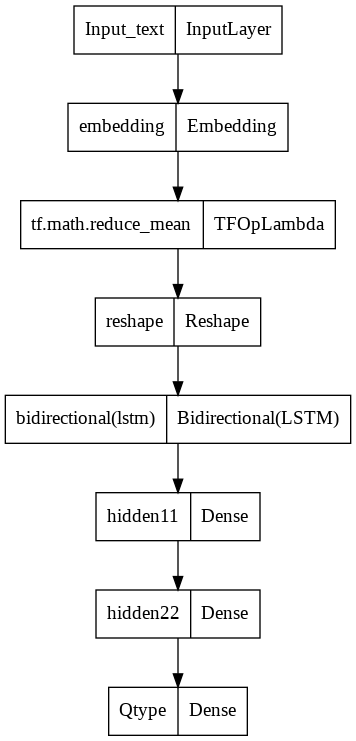

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
K.clear_session() #Restart seed = 0
from tensorflow.keras.layers import Dropout,LSTM,Reshape,SpatialDropout1D,Bidirectional,TimeDistributed
from tensorflow.keras.optimizers import Adam , RMSprop,Nadam

# here we have  text input.

in_text = keras.Input(batch_shape=(None, max_len),name="Input_text")

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)

Reshape=Reshape((-1,100))(averaged)  #LSTM


model=Bidirectional(LSTM(50,activation='relu',
                         recurrent_activation='tanh',
                         kernel_initializer='HeNormal',dropout=0.3,
                         recurrent_dropout=0.2))(Reshape)



#  dense layers for each task
hidden11 = Dense(1024, activation='relu', name='hidden11')(model)
hidden22 = Dense(512, activation='relu', name='hidden22')(hidden11)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_Qtype = Dense(len_QType, activation='softmax', name='Qtype')(hidden22)
p_source = Dense(len_source, activation='softmax', name='source')(hidden22)

 


# define model input/output using keys.
model = keras.Model(
    inputs={
        'Question_clean': in_text,
            },
    outputs={
        'Qtype': p_Qtype,
        # 'Source': p_source,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Nadam(learning_rate=0.001, beta_1=0.9,
                    beta_2=0.999, epsilon=1e-07, name="Nadam"),

    loss={
        'Qtype': 'sparse_categorical_crossentropy',
        # 'Source': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'Qtype': 1,
        # 'Source': 0.5,       
    },
    metrics={
        'Qtype': ['SparseCategoricalAccuracy'],
        # 'Source': ['SparseCategoricalAccuracy'],
    },
)


# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='RNN+LSTM.png')

### Model Training

Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
# y_train_Qtype=data_train['QType']
# y_train_source=data_train['source']


In [ ]:
%%time
tf.debugging.set_log_device_placement(True)
history = model.fit(
    x={
        'Question_clean': x_train_text_id,
        },
    y={
        'Qtype': y_train_Qtype,
        # 'Source': y_train_source,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, )  # val_Qtype_loss
    ],
    verbose=1
)

Epoch 1/20
1524/1524 [==============================] - 59s 33ms/step - loss: 0.8786 - sparse_categorical_accuracy: 0.7458 - val_loss: 0.1659 - val_sparse_categorical_accuracy: 0.9549
Epoch 2/20
1524/1524 [==============================] - 50s 33ms/step - loss: 0.1178 - sparse_categorical_accuracy: 0.9703 - val_loss: 0.1033 - val_sparse_categorical_accuracy: 0.9744
Epoch 3/20
1524/1524 [==============================] - 48s 32ms/step - loss: 0.0718 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.0899 - val_sparse_categorical_accuracy: 0.9780
Epoch 4/20
1524/1524 [==============================] - 48s 32ms/step - loss: 0.0517 - sparse_categorical_accuracy: 0.9830 - val_loss: 0.0931 - val_sparse_categorical_accuracy: 0.9739
Epoch 5/20
1524/1524 [==============================] - 49s 32ms/step - loss: 0.0454 - sparse_categorical_accuracy: 0.9838 - val_loss: 0.0931 - val_sparse_categorical_accuracy: 0.9790
Epoch 6/20
1524/1524 [==============================] - 50s 33ms/step - loss: 0.

### Data Preprocessing (Testing)

Here we use the trained tokenizer to pre-process the testing set.

In [ ]:
#prepare test data
# Repeated
# x_test_text= data_test['Question_Clean']

# y_test_Qtype=data_test['QType']
# y_test_source=data_test['source']

In [ ]:
x_test_text.shape

(16408,)

In [ ]:
x_test_text_id = preprocess_Embedding(x_test_text)

In [ ]:
x_test_text_id

array([[3955,    1,    0, ...,    0,    0,    0],
       [   2,   76,   46, ...,    0,    0,    0],
       [3430,  202,   18, ...,    0,    0,    0],
       ...,
       [  38,   36, 2872, ...,    0,    0,    0],
       [  11, 3127,  409, ...,    0,    0,    0],
       [ 136, 2681,    8, ...,    0,    0,    0]], dtype=int32)

### Prediction

We can use the model to predict the testing samples.

In [ ]:
# we can do prediction on training set
y_predict = model.predict(x_test_text_id) #one input


# probabilities
Qtype_predicted = y_predict['Qtype']
print(Qtype_predicted)

# categories
Qtype_category_predicted = np.argmax(Qtype_predicted, axis=1)
print(Qtype_category_predicted)


[[9.4155961e-11 8.0417769e-16 4.4732295e-07 ... 1.3403387e-10
  4.0219290e-09 1.1174927e-13]
 [5.8077741e-11 8.8241831e-11 2.6346316e-13 ... 3.5263204e-13
  2.4221337e-12 3.2408097e-15]
 [2.4508548e-24 8.6627610e-38 9.8088841e-14 ... 1.3246182e-09
  2.5467743e-06 7.0726888e-30]
 ...
 [3.1152403e-08 2.0779641e-21 0.0000000e+00 ... 6.3944172e-10
  2.5610596e-09 1.5454476e-23]
 [0.0000000e+00 0.0000000e+00 2.7967952e-35 ... 1.1511311e-34
  1.7552262e-14 0.0000000e+00]
 [8.0574618e-12 6.9380216e-27 4.8240161e-25 ... 9.9999964e-01
  3.2549657e-10 1.9682349e-26]]
[18 34 19 ... 10  9 36]


### Visualization

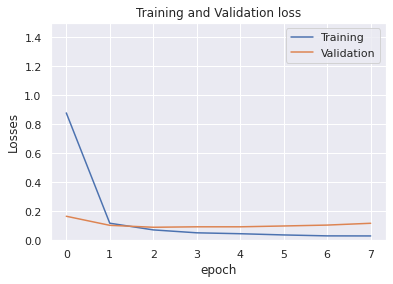

In [ ]:
plot_loss_Acc(losstype='loss',val_losstype='val_loss',Type='loss')


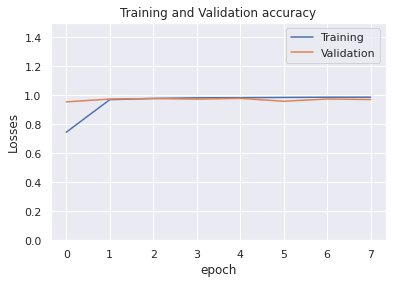

In [ ]:
plot_loss_Acc(losstype='sparse_categorical_accuracy',val_losstype='val_sparse_categorical_accuracy',Type='accuracy')

There is a **`well-fitting`** because of no gab between train and validation

using this ref :

https://dagshub.com/raduga256/Text-Classification-with-NLP-Tf-Idf-vs-Word2Vec-vs-BERT/src/main/news_category_classification.ipynb

Accuracy :  0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00       832
           3       1.00      1.00      1.00       373
           4       0.14      0.09      0.11       219
           5       0.56      1.00      0.72         9
           6       1.00      1.00      1.00       404
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00       411
           9       1.00      1.00      1.00       732
          10       1.00      1.00      1.00       365
          11       1.00      1.00      1.00       400
          12       1.00      1.00      1.00       386
          13       1.00      0.60      0.75        10
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        45
          16       1.00      1.00      1.00       163
          

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

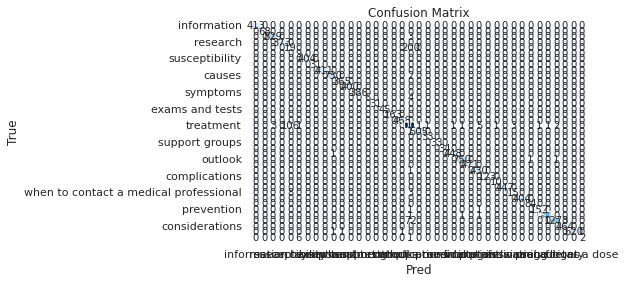

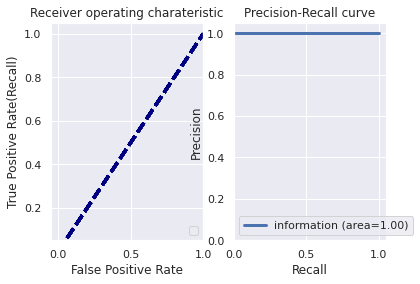

In [ ]:
from sklearn import metrics
# Q_type.values categories

classes = classes_Qtype[:-1]
y_test_array = pd.get_dummies(y_test_Qtype, drop_first=False).values

## Accuracy, Precision, Recall
y_test = y_test_Qtype
y_test=np.asarray(y_test)
predicted = Qtype_category_predicted
predicted_prob = Qtype_predicted
accuracy = metrics.accuracy_score(y_test, predicted)
# auc = metrics.roc_auc_score(list(y_test), Qtype_category_predicted, multi_class="ovr")

print("Accuracy : ", round(accuracy,2))
# print("AUC : ", round(auc,2))
# print("Detail : ")
# print("Detail : ")
print(metrics.classification_report(y_test, predicted))

## Plot Confusion Matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes,yticklabels=classes, title="Confusion Matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
# ## Plot ROC
for i in range(len(classes)):
  fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i], predicted_prob[:, i])
  ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
  ax[0].set(xlim=[-0.05, 1.0], ylim=[0.05, 1.05],
            xlabel="False Positive Rate",
            ylabel="True Positive Rate(Recall)",
            title="Receiver operating charateristic")
  ax[0].legend(loc="lower right")
  ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
  precision, recall, thresholds = metrics.precision_recall_curve(
      y_test_array[:,i], predicted_prob[:,i]) 
  ax[1].plot(recall, precision, lw=3, label='{0} (area={1:0.2f})'.format(classes[i],
                                                                         metrics.auc(recall, precision))
  )
  ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
  ax[1].legend(loc="best")
  ax[1].grid(True)
  plt.show()
  

### Deployment

What are the symptoms of Adult Acute Lymphoblastic Leukemia ?  

	CancerGov	symptoms
How to diagnose Adult Acute Lymphoblastic Leukemia ? 

    CancerGov	exams and tests

In [ ]:
# ----------- Dataset : UNSEEN DATASET ----------- #

some_text2 = ['which are the symptoms of young Acute Lymphoblastic Leukemia ?',
             'How to diagnose Adult Acute Lymphoblastic Leukemia ?']  #'How to check young Acute Lymphoblastic Leukemia ?  >>> information 6

unseen_df = pd.DataFrame({'text':some_text2}) # Notice this doesn't have y_variable. This the is the data set I am trying to predict y_variable labels 1 or 0.

# Clean text
unseen_df['text'] = unseen_df['text'].map(
    lambda x: preprocess_text(x,Stemmer=Porter,Lemmatization=False) if isinstance(x, str) else x )# if x STR >> clean data by function

X_unseen_id = preprocess_Embedding(unseen_df['text'])


In [ ]:
X_unseen_id

array([[  2, 935,  79, 867,  99,   0,   0,   0],
       [ 11,  84,  79, 867,  99,   0,   0,   0]], dtype=int32)

In [ ]:
Preprocessed_data.iloc[[30499,30500]]['QType']

30499    34
30500     9
Name: QType, dtype: int8

In [ ]:
# y_pred_unseen = model.predict(X_unseen_id) 

# we can do prediction on training set
y_pred_unseen = model.predict(X_unseen_id) #one input


print(unseen_category_predicted)
# probabilities
y_pred_unseen = y_pred_unseen['Qtype']

# categories
unseen_category_predicted = np.argmax(y_pred_unseen, axis=1)
print(y_pred_unseen)


[34  9]
[[2.50718668e-09 3.88295485e-09 2.04668660e-11 7.49864781e-10
  1.51081636e-08 5.29252206e-12 2.65464051e-09 4.33643572e-13
  2.42318920e-09 2.26924677e-11 1.54823640e-10 5.05301460e-11
  7.99207645e-11 1.58945936e-14 3.82370832e-14 1.10330717e-14
  6.97175720e-11 5.93988678e-11 2.85777304e-07 5.22549989e-11
  1.44043666e-10 4.50846693e-09 1.25825195e-09 1.58495786e-10
  1.13911955e-08 2.70260703e-10 7.85948973e-10 7.37709949e-10
  3.92081895e-10 1.59687796e-09 9.80512736e-14 7.11247294e-12
  7.85509879e-10 3.43967432e-09 9.99999285e-01 3.90032426e-07
  7.70401590e-11 1.55546451e-10 1.99422401e-12]
 [0.00000000e+00 0.00000000e+00 1.36643312e-35 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 6.87505205e-36 5.08144723e-28
  4.24762043e-35 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.06875368e-33 2.16318942e-11 1.19679826e-14
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.60664283e-17
  0.00000000e+

## 3- **GRU/LSTM model**

* Here i used text as an input .

* I used  RNN with LSTM .

* Another option with GRU .

* Theortically LSTM is better with long term dependices (Long data) than GRU ,and Practically LSTM has approved that.

I tried another method using bidirctional RNN,I it was better because it use two dirction of backpropagtion. 


## Accuracy = 99%

### Model Architecture

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_text (InputLayer)     [(None, 8)]               0         
                                                                 
 embedding (Embedding)       (None, 8, 100)            1100000   
                                                                 
 tf.math.reduce_mean (TFOpLa  (None, 100)              0         
 mbda)                                                           
                                                                 
 reshape (Reshape)           (None, 1, 100)            0         
                                                                 
 gru (GRU)                   (None, 200)               181200    
                                                                 
 hidden11 (Dense)            (None, 1024)              205824    
                                                             

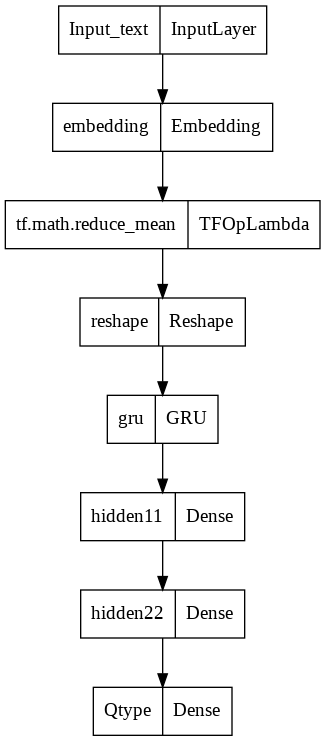

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
K.clear_session() #Restart seed = 0
from tensorflow.keras.layers import Dropout,LSTM,Reshape,SpatialDropout1D,Bidirectional,TimeDistributed,GRU
from tensorflow.keras.optimizers import Adam , RMSprop,Nadam

# here we have  text input.

in_text = keras.Input(batch_shape=(None, max_len),name="Input_text")

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)

Reshape=Reshape((-1,100))(averaged)  #LSTM

# model=LSTM(200,activation='relu',recurrent_activation='tanh',
#            kernel_initializer='HeNormal',dropout=0.3,
#            recurrent_dropout=0.2)(Reshape)
           
model=GRU(200,activation='relu',recurrent_activation='tanh',
           kernel_initializer='HeNormal',dropout=0.5,
           recurrent_dropout=0.2)(Reshape)



#  dense layers for each task
hidden11 = Dense(1024, activation='relu', name='hidden11')(model)
hidden22 = Dense(512, activation='relu', name='hidden22')(hidden11)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_Qtype = Dense(len_QType, activation='softmax', name='Qtype')(hidden22)
p_source = Dense(len_source, activation='softmax', name='source')(hidden22)

 


# define model input/output using keys.
model = keras.Model(
    inputs={
        'Question_clean': in_text,
            },
    outputs={
        'Qtype': p_Qtype,
        # 'Source': p_source,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Nadam(learning_rate=0.001, beta_1=0.9,
                    beta_2=0.999, epsilon=1e-07, name="Nadam"),

    loss={
        'Qtype': 'sparse_categorical_crossentropy',
        # 'Source': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'Qtype': 1,
        # 'Source': 0.5,       
    },
    metrics={
        'Qtype': ['SparseCategoricalAccuracy'],
        # 'Source': ['SparseCategoricalAccuracy'],
    },
)


# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='GRU.png')

### Model Training

Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
# y_train_Qtype=data_train['QType']
# y_train_source=data_train['source']


In [ ]:
%%time
tf.debugging.set_log_device_placement(True)
history = model.fit(
    x={
        'Question_clean': x_train_text_id,
        },
    y={
        'Qtype': y_train_Qtype,
        # 'Source': y_train_source,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.3,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, )  # val_Qtype_loss
    ],
    verbose=1
)

Epoch 1/20
1334/1334 [==============================] - 32s 21ms/step - loss: 0.4396 - sparse_categorical_accuracy: 0.8861 - val_loss: 0.1061 - val_sparse_categorical_accuracy: 0.9731
Epoch 2/20
1334/1334 [==============================] - 27s 20ms/step - loss: 0.0741 - sparse_categorical_accuracy: 0.9788 - val_loss: 0.0809 - val_sparse_categorical_accuracy: 0.9816
Epoch 3/20
1334/1334 [==============================] - 27s 20ms/step - loss: 0.0551 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.0932 - val_sparse_categorical_accuracy: 0.9700
Epoch 4/20
1334/1334 [==============================] - 27s 20ms/step - loss: 0.0430 - sparse_categorical_accuracy: 0.9854 - val_loss: 0.0979 - val_sparse_categorical_accuracy: 0.9725
Epoch 5/20
1334/1334 [==============================] - 27s 20ms/step - loss: 0.0413 - sparse_categorical_accuracy: 0.9853 - val_loss: 0.1014 - val_sparse_categorical_accuracy: 0.9731
Epoch 6/20
1334/1334 [==============================] - 26s 20ms/step - loss: 0.

### Data Preprocessing (Testing)

Here we use the trained tokenizer to pre-process the testing set.

In [ ]:
#prepare test data
# Repeated
# x_test_text= data_test['Question_Clean']

# y_test_Qtype=data_test['QType']
# y_test_source=data_test['source']

In [ ]:
x_test_text.shape

(16408,)

In [ ]:
x_test_text_id = preprocess_Embedding(x_test_text)

In [ ]:
x_test_text_id

array([[3955,    1,    0, ...,    0,    0,    0],
       [   2,   76,   46, ...,    0,    0,    0],
       [3430,  202,   18, ...,    0,    0,    0],
       ...,
       [  38,   36, 2872, ...,    0,    0,    0],
       [  11, 3127,  409, ...,    0,    0,    0],
       [ 136, 2681,    8, ...,    0,    0,    0]], dtype=int32)

### Prediction

We can use the model to predict the testing samples.

In [ ]:
# we can do prediction on training set
y_predict = model.predict(x_test_text_id) #one input


# probabilities
Qtype_predicted = y_predict['Qtype']
print(Qtype_predicted)

# categories
Qtype_category_predicted = np.argmax(Qtype_predicted, axis=1)
print(Qtype_category_predicted)


[[1.5689652e-08 1.5803132e-10 1.5868497e-06 ... 4.4712096e-09
  4.1679353e-09 4.9836128e-08]
 [4.6645638e-28 9.8826976e-25 6.5330841e-18 ... 2.1628209e-27
  3.7134226e-16 4.6928956e-25]
 [1.0278316e-21 9.4215085e-32 4.0167674e-20 ... 2.8788250e-12
  1.6924088e-24 2.4153803e-34]
 ...
 [3.0793693e-23 2.9942092e-21 5.0224537e-29 ... 2.5215214e-21
  3.4647694e-28 3.3414823e-27]
 [1.4806358e-37 4.9697127e-32 5.3348362e-17 ... 0.0000000e+00
  5.4994874e-22 6.6937068e-32]
 [2.0612989e-13 8.1650054e-15 3.7848340e-21 ... 1.0000000e+00
  5.1364736e-17 7.6617499e-21]]
[18 34 19 ... 10  9 36]


### Visualization

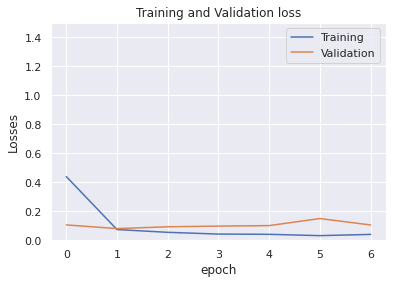

In [ ]:
plot_loss_Acc(losstype='loss',val_losstype='val_loss',Type='loss')


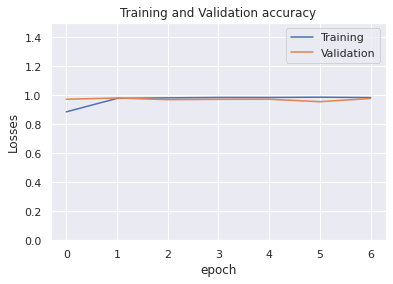

In [ ]:
plot_loss_Acc(losstype='sparse_categorical_accuracy',val_losstype='val_sparse_categorical_accuracy',Type='accuracy')

There is a **`well-fitting`** because of no gab between train and validation

using this ref :

https://dagshub.com/raduga256/Text-Classification-with-NLP-Tf-Idf-vs-Word2Vec-vs-BERT/src/main/news_category_classification.ipynb

In [ ]:
print(classes_source)
print(classes_Qtype)

<StringArray>
[                 'ADAM',            'MPlusDrugs', 'MPlusHerbsSupplements',
             'CancerGov',                  'GARD',                   'GHR',
     'MPlusHealthTopics',                 'NIDDK',                 'NINDS',
       'NIHSeniorHealth',                 'NHLBI',                   'CDC',
                    <NA>]
Length: 13, dtype: string
<StringArray>
[                            'information',
                                'research',
                          'susceptibility',
                                  'causes',
                                'symptoms',
                         'exams and tests',
                               'treatment',
                          'support groups',
                                 'outlook',
                           'complications',
  'when to contact a medical professional',
                              'prevention',
                          'considerations',
                                  'stages',


Accuracy :  0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00        68
           2       0.99      1.00      1.00       832
           3       1.00      1.00      1.00       373
           4       0.16      0.09      0.11       219
           5       0.89      0.89      0.89         9
           6       1.00      1.00      1.00       404
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00       411
           9       1.00      1.00      1.00       732
          10       1.00      1.00      1.00       365
          11       1.00      1.00      1.00       400
          12       1.00      1.00      1.00       386
          13       0.88      0.70      0.78        10
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        45
          16       1.00      1.00      1.00       163
          

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

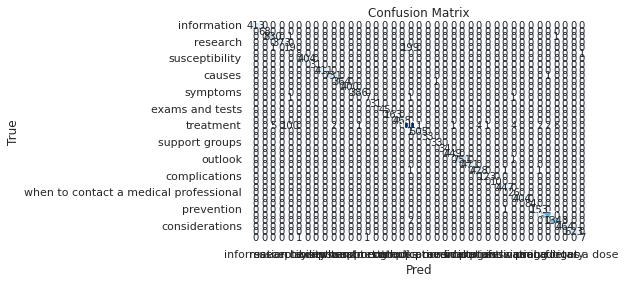

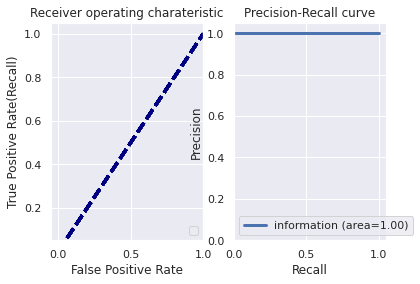

In [ ]:
from sklearn import metrics
# Q_type.values categories

classes = classes_Qtype[:-1]
y_test_array = pd.get_dummies(y_test_Qtype, drop_first=False).values

## Accuracy, Precision, Recall
y_test = y_test_Qtype
y_test=np.asarray(y_test)
predicted = Qtype_category_predicted
predicted_prob = Qtype_predicted
accuracy = metrics.accuracy_score(y_test, predicted)
# auc = metrics.roc_auc_score(list(y_test), Qtype_category_predicted, multi_class="ovr")

print("Accuracy : ", round(accuracy,2))
# print("AUC : ", round(auc,2))
# print("Detail : ")
# print("Detail : ")
print(metrics.classification_report(y_test, predicted))

## Plot Confusion Matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes,yticklabels=classes, title="Confusion Matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
# ## Plot ROC
for i in range(len(classes)):
  fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i], predicted_prob[:, i])
  ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
  ax[0].set(xlim=[-0.05, 1.0], ylim=[0.05, 1.05],
            xlabel="False Positive Rate",
            ylabel="True Positive Rate(Recall)",
            title="Receiver operating charateristic")
  ax[0].legend(loc="lower right")
  ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
  precision, recall, thresholds = metrics.precision_recall_curve(
      y_test_array[:,i], predicted_prob[:,i]) 
  ax[1].plot(recall, precision, lw=3, label='{0} (area={1:0.2f})'.format(classes[i],
                                                                         metrics.auc(recall, precision))
  )
  ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
  ax[1].legend(loc="best")
  ax[1].grid(True)
  plt.show()
  

### Deployment

What are the symptoms of Adult Acute Lymphoblastic Leukemia ?  

	CancerGov	symptoms
How to diagnose Adult Acute Lymphoblastic Leukemia ? 

    CancerGov	exams and tests

In [ ]:
# ----------- Dataset : UNSEEN DATASET ----------- #

some_text2 = ['which are the symptoms of young Acute Lymphoblastic Leukemia ?',
             'How to diagnose Adult Acute Lymphoblastic Leukemia ?']  #'How to check young Acute Lymphoblastic Leukemia ?  >>> information 6

unseen_df = pd.DataFrame({'text':some_text2}) # Notice this doesn't have y_variable. This the is the data set I am trying to predict y_variable labels 1 or 0.

# Clean text
unseen_df['text'] = unseen_df['text'].map(
    lambda x: preprocess_text(x,Stemmer=Porter,Lemmatization=False) if isinstance(x, str) else x )# if x STR >> clean data by function

X_unseen_id = preprocess_Embedding(unseen_df['text'])


In [ ]:
X_unseen_id

array([[  2, 935,  79, 867,  99,   0,   0,   0],
       [ 11,  84,  79, 867,  99,   0,   0,   0]], dtype=int32)

In [ ]:
Preprocessed_data.iloc[[30499,30500]]['QType']

30499    34
30500     9
Name: QType, dtype: int8

In [ ]:
# y_pred_unseen = model.predict(X_unseen_id) 

# we can do prediction on training set
y_pred_unseen = model.predict(X_unseen_id) #one input


# probabilities
y_pred_unseen = y_pred_unseen['Qtype']
print(y_pred_unseen)

# categories
unseen_category_predicted = np.argmax(y_pred_unseen, axis=1)

print(unseen_category_predicted)

[[1.0532829e-27 1.1009899e-24 6.2105117e-17 3.9534327e-15 1.4480030e-16
  2.3288730e-19 6.5045412e-24 1.8152695e-29 3.4299432e-23 6.3177992e-14
  3.8069462e-28 1.6373634e-16 2.9542013e-24 2.5601412e-32 3.0519133e-22
  1.0662024e-28 8.5832648e-23 1.0713087e-17 1.6512596e-13 3.0462511e-28
  4.2079783e-28 4.4949653e-27 9.3751571e-31 3.5567633e-25 9.2596815e-23
  2.3236894e-20 2.4652174e-13 6.0172996e-17 2.2228835e-30 4.1589442e-25
  6.2256964e-31 1.8619604e-26 1.7847871e-24 2.5813201e-27 1.0000000e+00
  1.4843552e-13 7.1957142e-27 9.6605505e-16 2.2207872e-25]
 [0.0000000e+00 0.0000000e+00 3.3828593e-19 0.0000000e+00 1.9043823e-22
  2.0052775e-21 2.2805888e-35 0.0000000e+00 0.0000000e+00 1.0000000e+00
  6.5285868e-37 7.4243436e-23 3.7137749e-17 0.0000000e+00 7.8424198e-30
  5.3749045e-28 1.1347750e-30 6.7872052e-22 9.6324174e-20 7.5685569e-37
  0.0000000e+00 1.0791047e-34 4.9087628e-31 0.0000000e+00 6.4658048e-15
  4.8191868e-15 2.1470156e-25 1.7858261e-20 0.0000000e+00 4.4739341e-30
  9.7

## **Findings**

### 1- The best model that scored accuracy = 99 % is GRU model.

### 2- I used 2 split ratios = 20 % , 35 % they gave same results.

### 3- We could use it in preductive analysis to get any question type 

### 4- We designed our model as a **pipeline** to do Multi task if we want to predict source and Question type based on our input( Question)

### 5- We could Also make our design to be Multi-Modal multi-Task

# **6-Questions**
 

## **6.1 Q1: Hypothesis: Is the Set of questions from source ( CancerGov ) significantly higher than the set of questions from source ( NIHSeniorHealth ) with the subject cancer ?**

Null Hypothesis:

-The set of questions with the subject cancer from
source ( **CancerGov** ) is  higher than the set of questions
with the subject cancer from source ( **NIHSeniorHealth** ).

Alternative Hypothesis : 

-The set of questions with the subject cancer from
source ( **CancerGov** ) is not higher than the set of questions
with the subject cancer from source ( **NIHSeniorHealth** ).


Motivation for the answer:

This Question could help us to
know which source provides a bigger question set,
which is meant to be a better source.

- We care about Cancer because it is an essential subject in our life,
So our project could help people to predict if they have cancer or about to have it or they would not have it.

- So our hypothesis depends on the sources which have enough answers to questions ,
Which we conclude that in  **Part 2.3.1** 
  -  **CancerGov** and **NIHSeniorHealth**

In [ ]:
analysis.head()

Question  \
0                                         What is (are) A guide to clinical trials for cancer ?   
1  what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   
2                                      Do you have information about A guide to herbal remedies   
3                                                                      What is (are) A1C test ?   
4                                                                Who is at risk for A1C test? ?   

            QType Answer source  \
0     information    NaN   ADAM   
1        research    NaN   ADAM   
2     information    NaN   ADAM   
3     information    NaN   ADAM   
4  susceptibility    NaN   ADAM   

                                                                       url  \
0  https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   
1  https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000823.htm   
2  https://www.nlm.nih.gov/medlineplus/ency/patientinstructions/000868.htm   
3              https://www.nlm.nih.gov/medlineplus/ency/article/003640.htm   
4              https://www.nlm.nih.gov/medlineplus/ency/article/003640.htm   

                                   Focus Qtype-Coarse  
0  A guide to clinical trials for cancer          NaN  
1  A guide to clinical trials for cancer          NaN  
2             A guide to herbal remedies          NaN  
3                               A1C test          NaN  
4                               A1C test          NaN

In [ ]:
CancerGov=analysis[analysis['source']=="CancerGov"]
CancerGov.head()

Question  \
30498             What is (are) Adult Acute Lymphoblastic Leukemia ?   
30499  What are the symptoms of Adult Acute Lymphoblastic Leukemia ?   
30500           How to diagnose Adult Acute Lymphoblastic Leukemia ?   
30501   What is the outlook for Adult Acute Lymphoblastic Leukemia ?   
30502       Who is at risk for Adult Acute Lymphoblastic Leukemia? ?   

                 QType  \
30498      information   
30499         symptoms   
30500  exams and tests   
30501          outlook   
30502   susceptibility   

                                                                                                    Answer  \
30498  Key Points\n                    - Adult acute lymphoblastic leukemia (ALL) is a type of cancer i...   
30499  Signs and symptoms of adult ALL include fever, feeling tired, and easy bruising or bleeding. The...   
30500  Tests that examine the blood and bone marrow are used to detect (find) and diagnose adult ALL. T...   
30501  Certain factors affect prognosis (chance of recovery) and treatment options. The prognosis (chan...   
30502  Previous chemotherapy and exposure to radiation may increase the risk of developing ALL. Anythin...   

          source  \
30498  CancerGov   
30499  CancerGov   
30500  CancerGov   
30501  CancerGov   
30502  CancerGov   

                                                                         url  \
30498  https://www.cancer.gov/types/leukemia/patient/adult-all-treatment-pdq   
30499  https://www.cancer.gov/types/leukemia/patient/adult-all-treatment-pdq   
30500  https://www.cancer.gov/types/leukemia/patient/adult-all-treatment-pdq   
30501  https://www.cancer.gov/types/leukemia/patient/adult-all-treatment-pdq   
30502  https://www.cancer.gov/types/leukemia/patient/adult-all-treatment-pdq   

                                    Focus Qtype-Coarse  
30498  Adult Acute Lymphoblastic Leukemia          NaN  
30499  Adult Acute Lymphoblastic Leukemia          NaN  
30500  Adult Acute Lymphoblastic Leukemia        Tests  
30501  Adult Acute Lymphoblastic Leukemia          NaN  
30502  Adult Acute Lymphoblastic Leukemia          NaN

In [ ]:
Binary_cancergov=[]
for i in CancerGov['Focus']:
    if ('Cancer') in i :
       Binary_cancergov.append(1)
    else:
       Binary_cancergov.append(0)
   

In [ ]:
len(Binary_cancergov)

729

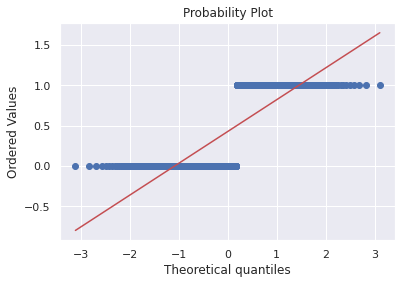

In [ ]:
import scipy.stats as stats
import pylab

stats.probplot(Binary_cancergov, dist="norm", plot=pylab)
pylab.show() # not normal distribution because of the lines on in the same positon 

The data is not norml distribution

In [ ]:
NIHSeniorHealth=analysis[analysis['source']=="NIHSeniorHealth"]
NIHSeniorHealth.head()

Question  \
45282                What is (are) Age-related Macular Degeneration ?   
45283          Who is at risk for Age-related Macular Degeneration? ?   
45284     What are the symptoms of Age-related Macular Degeneration ?   
45285  What are the treatments for Age-related Macular Degeneration ?   
45286                What is (are) Age-related Macular Degeneration ?   

                QType  \
45282     information   
45283  susceptibility   
45284        symptoms   
45285       treatment   
45286     information   

                                                                                                    Answer  \
45282  Age-related macular degeneration, also known as AMD, is an eye disease that affects the macula, ...   
45283  Risk Increases With Age AMD is most common in older people, but it can occur during middle age. ...   
45284  AMD is detected during a comprehensive eye exam that includes a visual acuity test, a dilated ey...   
45285  If You Have Advanced AMD Once dry AMD reaches the advanced stage, no form of treatment can preve...   
45286  Age-related macular degeneration, or AMD, is a disease that blurs the sharp, central vision you ...   

                source  \
45282  NIHSeniorHealth   
45283  NIHSeniorHealth   
45284  NIHSeniorHealth   
45285  NIHSeniorHealth   
45286  NIHSeniorHealth   

                                                                     url  \
45282  http://nihseniorhealth.gov/agerelatedmaculardegeneration/toc.html   
45283  http://nihseniorhealth.gov/agerelatedmaculardegeneration/toc.html   
45284  http://nihseniorhealth.gov/agerelatedmaculardegeneration/toc.html   
45285  http://nihseniorhealth.gov/agerelatedmaculardegeneration/toc.html   
45286  http://nihseniorhealth.gov/agerelatedmaculardegeneration/toc.html   

                                  Focus Qtype-Coarse  
45282  Age-related Macular Degeneration          NaN  
45283  Age-related Macular Degeneration          NaN  
45284  Age-related Macular Degeneration          NaN  
45285  Age-related Macular Degeneration        Drugs  
45286  Age-related Macular Degeneration          NaN

In [ ]:
Binary_NIHSeniorHealth=[]
for i in NIHSeniorHealth['Focus']:
    if ('Cancer') in i :
       Binary_NIHSeniorHealth.append(1)
    else:
       Binary_NIHSeniorHealth.append(0)

In [ ]:
len(Binary_NIHSeniorHealth)

769

### 1- method 1 using Levene 

In [ ]:
stat, pvalue_levene= stats.levene(Binary_cancergov,Binary_NIHSeniorHealth,center='mean')
print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis \n because their sets are not equal")
else:
    print("Fail to reject null hypothesis \n because their sets are  equal ")

p value:0.0000
Reject null hypothesis 
 because their sets are not equal


### 2-  method 2 using F_oneway

In [ ]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value

fvalue, pvalue = stats.f_oneway(Binary_cancergov,Binary_NIHSeniorHealth)
print(fvalue, pvalue)
if pvalue <0.05:
    print("Reject null hypothesis ")
else:
    print("Fail to reject null hypothesis ")

126.23110494160666 3.548284619008308e-28
Reject null hypothesis 


## **6.3 Q2: Predictive: What is the category/question-type that maps each single question? Can we effectively categorize the Question types automatically? Can our proposed approach perform better than state-of-the-art approaches/baselines?**

In [ ]:
Preprocessed_data.head(2)

Question  \
0                                         What is (are) A guide to clinical trials for cancer ?   
1  what research (or clinical trials) is being done for A guide to clinical trials for cancer ?   

   source  QType                                       Question_Clean  
0       0     18                             guid clinic trial cancer  
1       0     27  research clinic trial done guid clinic trial cancer

**We could use GRU model to predict the Qtype**

PipeLine :-

- Split data into train and test by 20 % .
- Use GRU To make model predicts Question type.
- measure it with accuracy - Roc - Auc , It gets accuracy = 99% .


###**GRU/LSTM model**

* Here i used text as an input .

* I used  RNN with LSTM .

* Another option with GRU .

* Theortically LSTM is better with long term dependices (Long data) than GRU ,and Practically LSTM has approved that.

I tried another method using bidirctional RNN,I it was better because it use two dirction of backpropagtion. 


## Accuracy = 99%

#### Model Architecture

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_text (InputLayer)     [(None, 8)]               0         
                                                                 
 embedding (Embedding)       (None, 8, 100)            1100000   
                                                                 
 tf.math.reduce_mean (TFOpLa  (None, 100)              0         
 mbda)                                                           
                                                                 
 reshape (Reshape)           (None, 1, 100)            0         
                                                                 
 gru (GRU)                   (None, 200)               181200    
                                                                 
 hidden11 (Dense)            (None, 1024)              205824    
                                                             

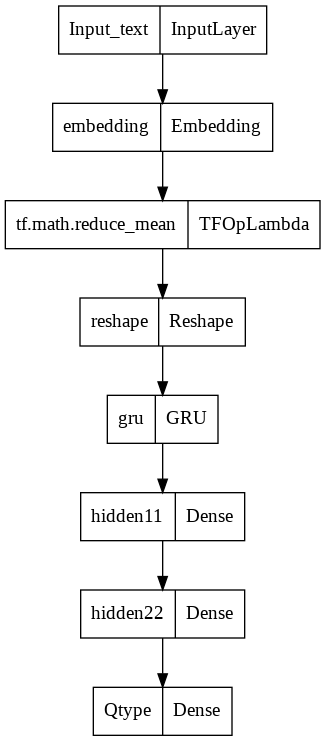

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
K.clear_session() #Restart seed = 0
from tensorflow.keras.layers import Dropout,LSTM,Reshape,SpatialDropout1D,Bidirectional,TimeDistributed,GRU
from tensorflow.keras.optimizers import Adam , RMSprop,Nadam

# here we have  text input.

in_text = keras.Input(batch_shape=(None, max_len),name="Input_text")

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)

Reshape=Reshape((-1,100))(averaged)  #LSTM

# model=LSTM(200,activation='relu',recurrent_activation='tanh',
#            kernel_initializer='HeNormal',dropout=0.3,
#            recurrent_dropout=0.2)(Reshape)
           
model=GRU(200,activation='relu',recurrent_activation='tanh',
           kernel_initializer='HeNormal',dropout=0.5,
           recurrent_dropout=0.2)(Reshape)



#  dense layers for each task
hidden11 = Dense(1024, activation='relu', name='hidden11')(model)
hidden22 = Dense(512, activation='relu', name='hidden22')(hidden11)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_Qtype = Dense(len_QType, activation='softmax', name='Qtype')(hidden22)
p_source = Dense(len_source, activation='softmax', name='source')(hidden22)

 


# define model input/output using keys.
model = keras.Model(
    inputs={
        'Question_clean': in_text,
            },
    outputs={
        'Qtype': p_Qtype,
        # 'Source': p_source,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Nadam(learning_rate=0.001, beta_1=0.9,
                    beta_2=0.999, epsilon=1e-07, name="Nadam"),

    loss={
        'Qtype': 'sparse_categorical_crossentropy',
        # 'Source': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'Qtype': 1,
        # 'Source': 0.5,       
    },
    metrics={
        'Qtype': ['SparseCategoricalAccuracy'],
        # 'Source': ['SparseCategoricalAccuracy'],
    },
)


# summarize layers
model.summary()
# plot graph
plot_model(model, to_file='GRU.png')

#### Model Training

Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
# y_train_Qtype=data_train['QType']
# y_train_source=data_train['source']


In [ ]:
%%time
tf.debugging.set_log_device_placement(True)
history = model.fit(
    x={
        'Question_clean': x_train_text_id,
        },
    y={
        'Qtype': y_train_Qtype,
        # 'Source': y_train_source,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, )  # val_Qtype_loss
    ],
    verbose=1
)

Epoch 1/20
1524/1524 [==============================] - 37s 21ms/step - loss: 0.3959 - sparse_categorical_accuracy: 0.8987 - val_loss: 0.0952 - val_sparse_categorical_accuracy: 0.9756
Epoch 2/20
1524/1524 [==============================] - 31s 20ms/step - loss: 0.0712 - sparse_categorical_accuracy: 0.9810 - val_loss: 0.0803 - val_sparse_categorical_accuracy: 0.9790
Epoch 3/20
1524/1524 [==============================] - 31s 20ms/step - loss: 0.0518 - sparse_categorical_accuracy: 0.9838 - val_loss: 0.1108 - val_sparse_categorical_accuracy: 0.9616
Epoch 4/20
1524/1524 [==============================] - 31s 20ms/step - loss: 0.0472 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0828 - val_sparse_categorical_accuracy: 0.9793
Epoch 5/20
1524/1524 [==============================] - 31s 20ms/step - loss: 0.0415 - sparse_categorical_accuracy: 0.9854 - val_loss: 0.0834 - val_sparse_categorical_accuracy: 0.9723
Epoch 6/20
1524/1524 [==============================] - 31s 20ms/step - loss: 0.

#### Data Preprocessing (Testing)

Here we use the trained tokenizer to pre-process the testing set.

In [ ]:
#prepare test data
# Repeated
# x_test_text= data_test['Question_Clean']

# y_test_Qtype=data_test['QType']
# y_test_source=data_test['source']

In [ ]:
x_test_text.shape

(16408,)

In [ ]:
x_test_text_id = preprocess_Embedding(x_test_text)

In [ ]:
x_test_text_id

array([[3955,    1,    0, ...,    0,    0,    0],
       [   2,   76,   46, ...,    0,    0,    0],
       [3430,  202,   18, ...,    0,    0,    0],
       ...,
       [  38,   36, 2872, ...,    0,    0,    0],
       [  11, 3127,  409, ...,    0,    0,    0],
       [ 136, 2681,    8, ...,    0,    0,    0]], dtype=int32)

#### Prediction

We can use the model to predict the testing samples.

In [ ]:
# we can do prediction on training set
y_predict = model.predict(x_test_text_id) #one input


# probabilities
Qtype_predicted = y_predict['Qtype']
print(Qtype_predicted)

# categories
Qtype_category_predicted = np.argmax(Qtype_predicted, axis=1)
print(Qtype_category_predicted)


[[1.3330533e-05 5.8137755e-07 1.5227207e-04 ... 6.0519579e-07
  3.1848890e-06 7.0433862e-06]
 [2.0363764e-34 5.4444909e-35 3.4115935e-32 ... 2.3403626e-33
  1.0772068e-30 0.0000000e+00]
 [2.2967939e-19 3.2426151e-15 1.5908898e-17 ... 1.4601588e-20
  7.7510946e-27 5.7736623e-24]
 ...
 [7.4260007e-27 4.2964903e-29 3.0056641e-22 ... 2.7742079e-14
  4.2912512e-28 0.0000000e+00]
 [2.5738476e-17 3.7548961e-17 3.1516085e-09 ... 2.1530382e-09
  1.3309404e-11 1.8749516e-11]
 [2.7614692e-14 3.1895505e-18 9.5009098e-17 ... 1.0000000e+00
  1.2535619e-25 5.0396674e-30]]
[18 34 19 ... 10  9 36]


#### Visualization

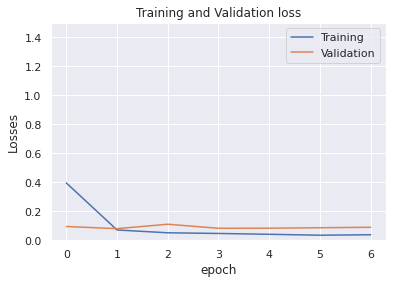

In [ ]:
plot_loss_Acc(losstype='loss',val_losstype='val_loss',Type='loss')


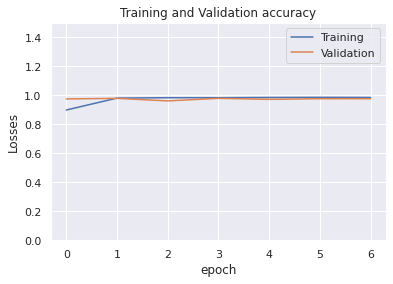

In [ ]:
plot_loss_Acc(losstype='sparse_categorical_accuracy',val_losstype='val_sparse_categorical_accuracy',Type='accuracy')

There is a **`well-fitting`** because of no gab between train and validation

In [ ]:
from sklearn import metrics
# Q_type.values categories

classes = classes_Qtype[:-1]
y_test_array = pd.get_dummies(y_test_Qtype, drop_first=False).values

## Accuracy, Precision, Recall
y_test = y_test_Qtype
y_test=np.asarray(y_test)
predicted = Qtype_category_predicted
predicted_prob = Qtype_predicted
accuracy = metrics.accuracy_score(y_test, predicted)
  

#### Deployment

What are the symptoms of Adult Acute Lymphoblastic Leukemia ?  

	CancerGov	symptoms
How to diagnose Adult Acute Lymphoblastic Leukemia ? 

    CancerGov	exams and tests

In [ ]:
# ----------- Dataset : UNSEEN DATASET ----------- #

some_text2 = ['which are the symptoms of young Acute Lymphoblastic Leukemia ?',
             'How to diagnose Adult Acute Lymphoblastic Leukemia ?']  #'How to check young Acute Lymphoblastic Leukemia ?  >>> information 6

unseen_df = pd.DataFrame({'text':some_text2}) # Notice this doesn't have y_variable. This the is the data set I am trying to predict y_variable labels 1 or 0.

# Clean text
unseen_df['text'] = unseen_df['text'].map(
    lambda x: preprocess_text(x,Stemmer=Porter,Lemmatization=False) if isinstance(x, str) else x )# if x STR >> clean data by function

X_unseen_id = preprocess_Embedding(unseen_df['text'])


In [ ]:
X_unseen_id

array([[  2, 935,  79, 867,  99,   0,   0,   0],
       [ 11,  84,  79, 867,  99,   0,   0,   0]], dtype=int32)

This is the truth data 

In [ ]:
Preprocessed_data.iloc[[30499,30500]]['QType']

30499    34
30500     9
Name: QType, dtype: int8

In [ ]:
# y_pred_unseen = model.predict(X_unseen_id) 

# we can do prediction on training set
y_pred_unseen = model.predict(X_unseen_id) #one input


# probabilities
y_pred_unseen = y_pred_unseen['Qtype']
print(y_pred_unseen)

# categories
unseen_category_predicted = np.argmax(y_pred_unseen, axis=1)

print(f"\n\n{unseen_category_predicted}")

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.1141110e-30 1.1248073e-36
  0.0000000e+00 1.1402583e-25 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.1490264e-32 3.8341406e-36 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 2.7324437e-21 1.0328712e-27
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0774793e-35
  1.5850732e-26 3.0747257e-28 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.9652257e-35 0.0000000e+00 0.0000000e+00 1.0000000e+00
  5.2643937e-28 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.5884625e-21 5.5518287e-21 1.0910486e-11 7.1101327e-23 3.8743778e-12
  2.6383376e-17 2.8839278e-10 2.0451854e-15 3.0158091e-08 1.0000000e+00
  2.3202109e-14 6.0701934e-15 2.6728170e-12 9.4900986e-13 1.8324255e-11
  7.5606419e-09 3.4145793e-22 3.0760180e-12 9.6376296e-10 1.6001175e-16
  5.6726712e-16 2.4580504e-22 4.8394214e-12 2.8455859e-22 2.2445893e-20
  2.8910389e-13 1.7602662e-13 3.5092189e-16 2.3867594e-10 2.6465629e-17
  2.1

# **7-Referrences**


links

https://keras.io/examples/nlp/question_answering/

https://www.projectpro.io/article/python-chatbot-project-learn-to-build-a-chatbot-from-scratch/429